<a href="https://colab.research.google.com/github/adhityan924/SEM/blob/main/SEM_Assignment_1_Adhityan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the dataset
Dataset name: "Single-soma transcriptomics of tangle-bearing neurons in Alzheimer’s disease - Inhibitory"
Custom Accession: 9813a1d4-d107-459e-9b2e-7687be935f69
URL: https://cellxgene.cziscience.com/collections/b953c942-f5d8-434f-9da7-e726ba7c1481Links to an external site.
Website: https://app.bxgenomics.com/bxg/app/scrnaview/app_project_review.php?ID=919#Links to an external site.

Installing Required Python Libraries

In [1]:
!pip install cellxgene-census
!pip install scanpy
!pip install pandas_profiling
!pip install pydantic-settings
!pip install ydata-profiling
!pip install jupyter-contrib-nbextensions
!pip install scikit-learn
!pip install igraph
!pip install scvi-tools
!pip install scikit-misc
!pip install leidenalg

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.6/179.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 8.1 MB/s eta 0:00:00
  Created wheel f

Importing the Libraries in new code snippet for reusability if Google Colab Disconnects

In [1]:
import cellxgene_census
import scanpy
import sys
import urllib
import pandas as pd
import numpy as np
import tiledbsoma
from ydata_profiling import ProfileReport
from google.colab import sheets
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


Task 1 Loading the Dataset

In [2]:
urllib.request.urlretrieve('https://datasets.cellxgene.cziscience.com/5d871206-9489-4d9f-8106-94305ccb1c3a.h5ad', 'dataset.h5ad')

adata = scanpy.read_h5ad('dataset.h5ad')
print(adata)

AnnData object with n_obs × n_vars = 23197 × 33091
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'


Visualising the Data

In [4]:
print(adata)

AnnData object with n_obs × n_vars = 23197 × 33091
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'


Analysing the data in depth and seeing the variables present

In [5]:
obs_attributes = adata.obs.columns.tolist()  # List of obs attributes
var_attributes = adata.var.columns.tolist()  # List of var attributes

print("Obs attributes:", obs_attributes)
print("Var attributes:", var_attributes)

Obs attributes: ['nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid']
Var attributes: ['feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type']


In [6]:
adata.var

,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
ENSG00000278915,False,ENSG00000278915.1,NCBITaxon:9606,gene,577,lncRNA
ENSG00000168454,False,TXNDC2,NCBITaxon:9606,gene,1703,protein_coding
ENSG00000139180,False,NDUFA9,NCBITaxon:9606,gene,782,protein_coding
ENSG00000229177,False,ENSG00000229177.1,NCBITaxon:9606,gene,327,lncRNA
ENSG00000204564,False,C6orf136,NCBITaxon:9606,gene,653,protein_coding
...,...,...,...,...,...,...
ENSG00000160799,False,CCDC12,NCBITaxon:9606,gene,682,protein_coding
ENSG00000272264,False,ENSG00000272264.1,NCBITaxon:9606,gene,577,lncRNA
ENSG00000175792,False,RUVBL1,NCBITaxon:9606,gene,1013,protein_coding
ENSG00000066084,False,DIP2B,NCBITaxon:9606,gene,2676,protein_coding


In [7]:
adata.obs

,nCount_RNA,nFeature_RNA,percent.mt,SORT,Amyloid,Age,RIN,nCount_SCT,nFeature_SCT,nCount_Exon,...,tissue_type,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
C0001_AAACGGGCAGTACACT-1,927.0,694,1.833873,MAP2,C3,73,5.7,2092.0,787,344.0,...,tissue,inhibitory interneuron,10x 3' v2,Alzheimer disease,Homo sapiens,female,prefrontal cortex,unknown,73-year-old stage,5$tsN89o-C
C0001_AAACGGGGTACCGTAT-1,1251.0,886,6.474820,MAP2,C3,73,5.7,2440.0,915,598.0,...,tissue,inhibitory interneuron,10x 3' v2,Alzheimer disease,Homo sapiens,female,prefrontal cortex,unknown,73-year-old stage,i+HeMEM)4<
C0001_AAACGGGTCCAGAGGA-1,2972.0,1695,0.201884,MAP2,C3,73,5.7,2949.0,1695,968.0,...,tissue,inhibitory interneuron,10x 3' v2,Alzheimer disease,Homo sapiens,female,prefrontal cortex,unknown,73-year-old stage,oi@)SZWo%-
C0001_AAACGGGTCCTTCAAT-1,3619.0,1875,2.459243,MAP2,C3,73,5.7,3269.0,1873,1442.0,...,tissue,inhibitory interneuron,10x 3' v2,Alzheimer disease,Homo sapiens,female,prefrontal cortex,unknown,73-year-old stage,V#;BPg@9;|
C0001_AAAGATGGTCAACATC-1,3931.0,2247,2.467566,MAP2,C3,73,5.7,3441.0,2246,1753.0,...,tissue,inhibitory interneuron,10x 3' v2,Alzheimer disease,Homo sapiens,female,prefrontal cortex,unknown,73-year-old stage,dk0gL6!4f@
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C0078_TTTGATCGTATGGAGC-1,4433.0,2369,1.308369,MAP2control,No,71,6.5,6116.0,2389,1224.0,...,tissue,inhibitory interneuron,10x 3' v3,normal,Homo sapiens,male,prefrontal cortex,Hispanic or Latin American,71-year-old stage,N|15Er&V`0
C0078_TTTGGAGCATGCTGCG-1,7850.0,3063,6.369427,MAP2control,No,71,6.5,7434.0,3062,2240.0,...,tissue,inhibitory interneuron,10x 3' v3,normal,Homo sapiens,male,prefrontal cortex,Hispanic or Latin American,71-year-old stage,M5qQ&tg7&A
C0078_TTTGGAGCATTCACCC-1,5511.0,2269,6.060606,MAP2control,No,71,6.5,6401.0,2269,1363.0,...,tissue,inhibitory interneuron,10x 3' v3,normal,Homo sapiens,male,prefrontal cortex,Hispanic or Latin American,71-year-old stage,Ps0z9)*mN}
C0078_TTTGGTTTCCGAAATC-1,9837.0,3440,3.151367,MAP2control,No,71,6.5,7749.0,3419,2271.0,...,tissue,inhibitory interneuron,10x 3' v3,normal,Homo sapiens,male,prefrontal cortex,Hispanic or Latin American,71-year-old stage,y=Q)FsdSLx


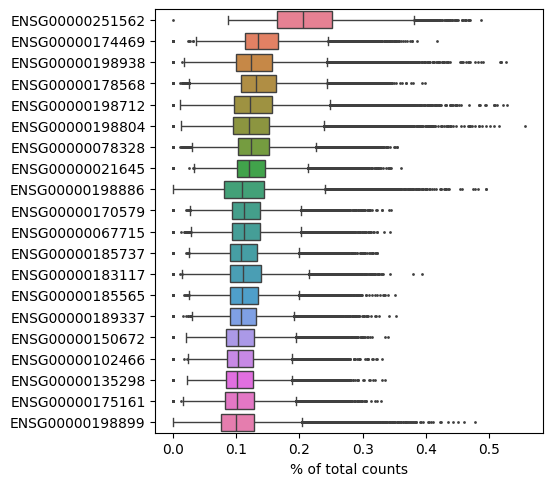

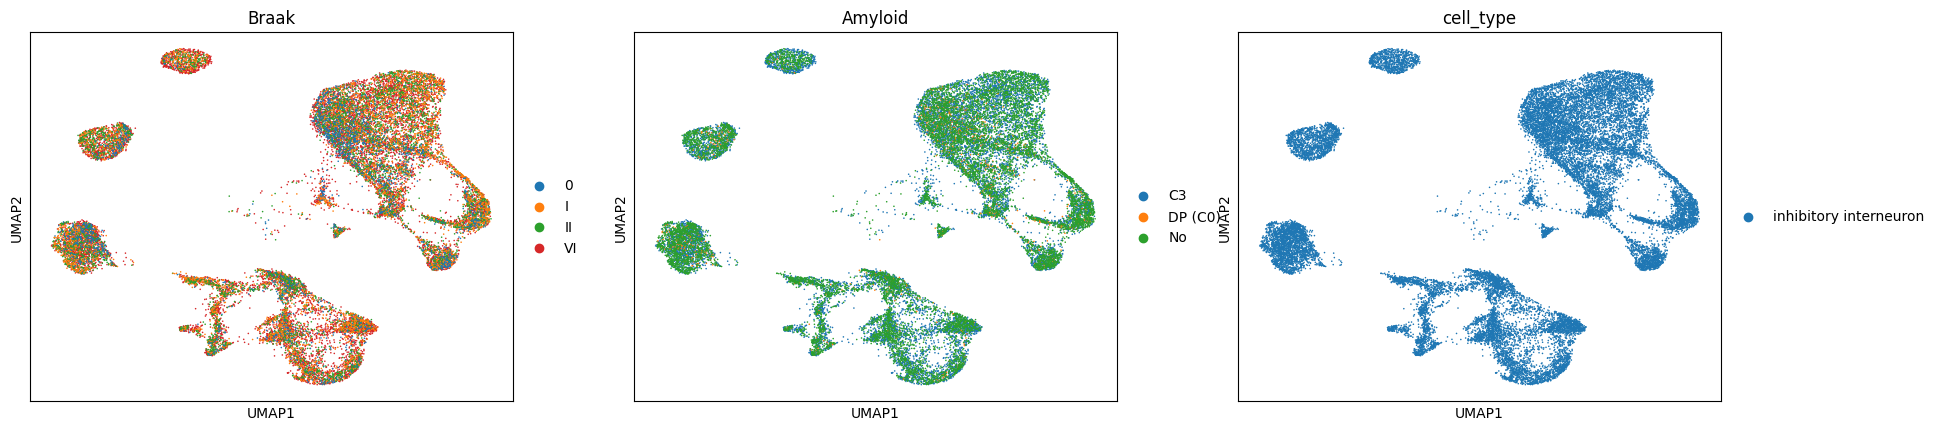

In [8]:
# Visualize the top 20 expressed genes
scanpy.pl.highest_expr_genes(adata, n_top=20)

# UMAP visualization using Braak and Amyloid scores
scanpy.pl.umap(adata, color=['Braak', 'Amyloid', 'cell_type'])

Extract and display the values under each attribute in obs


In [9]:
for obs_attr in adata.obs.columns:
    print(f"\nValues for obs attribute '{obs_attr}':")
    print(adata.obs[obs_attr].values)


Values for obs attribute 'nCount_RNA':
[ 927. 1251. 2972. ... 5511. 9837. 6275.]

Values for obs attribute 'nFeature_RNA':
[ 694  886 1695 ... 2269 3440 2510]

Values for obs attribute 'percent.mt':
[1.83387271 6.47482014 0.20188425 ... 6.06060606 3.15136729 1.56175299]

Values for obs attribute 'SORT':
['MAP2', 'MAP2', 'MAP2', 'MAP2', 'MAP2', ..., 'MAP2control', 'MAP2control', 'MAP2control', 'MAP2control', 'MAP2control']
Length: 23197
Categories (3, object): ['AT8', 'MAP2', 'MAP2control']

Values for obs attribute 'Amyloid':
['C3', 'C3', 'C3', 'C3', 'C3', ..., 'No', 'No', 'No', 'No', 'No']
Length: 23197
Categories (3, object): ['C3', 'DP (C0)', 'No']

Values for obs attribute 'Age':
['73', '73', '73', '73', '73', ..., '71', '71', '71', '71', '71']
Length: 23197
Categories (14, object): ['57', '61', '62', '66', ..., '81', '87', '89', '93']

Values for obs attribute 'RIN':
['5.7', '5.7', '5.7', '5.7', '5.7', ..., '6.5', '6.5', '6.5', '6.5', '6.5']
Length: 23197
Categories (10, object):

Extract and display the values under each attribute in var

In [10]:
for var_attr in adata.var.columns:
    print(f"\nValues for var attribute '{var_attr}':")
    print(adata.var[var_attr].values)


Values for var attribute 'feature_is_filtered':
[False False False ... False False False]

Values for var attribute 'feature_name':
['ENSG00000278915.1', 'TXNDC2', 'NDUFA9', 'ENSG00000229177.1', 'C6orf136', ..., 'CCDC12', 'ENSG00000272264.1', 'RUVBL1', 'DIP2B', 'CPSF3']
Length: 33091
Categories (33091, object): ['A1BG', 'A1BG-AS1', 'A1CF', 'A2M', ..., 'ZYX', 'ZZEF1', 'ZZZ3',
                             'hsa-mir-1253']

Values for var attribute 'feature_reference':
['NCBITaxon:9606', 'NCBITaxon:9606', 'NCBITaxon:9606', 'NCBITaxon:9606', 'NCBITaxon:9606', ..., 'NCBITaxon:9606', 'NCBITaxon:9606', 'NCBITaxon:9606', 'NCBITaxon:9606', 'NCBITaxon:9606']
Length: 33091
Categories (1, object): ['NCBITaxon:9606']

Values for var attribute 'feature_biotype':
['gene', 'gene', 'gene', 'gene', 'gene', ..., 'gene', 'gene', 'gene', 'gene', 'gene']
Length: 33091
Categories (1, object): ['gene']

Values for var attribute 'feature_length':
[577, 1703, 782, 327, 653, ..., 682, 577, 1013, 2676, 871]
Lengt

In [11]:
# Get gene id mapping to its name
if 'feature_name' in adata.var.columns:
    gene_ids = adata.var.index
    gene_names = adata.var['feature_name']

gene_mapping = dict(zip(gene_ids, gene_names))

print("\nMapping from gene ID to gene name (first 10 mappings):")
for gene_id, gene_name in list(gene_mapping.items())[:10]:
    print(f"Gene ID: {gene_id}, Gene Name: {gene_name}")


Mapping from gene ID to gene name (first 10 mappings):
Gene ID: ENSG00000278915, Gene Name: ENSG00000278915.1
Gene ID: ENSG00000168454, Gene Name: TXNDC2
Gene ID: ENSG00000139180, Gene Name: NDUFA9
Gene ID: ENSG00000229177, Gene Name: ENSG00000229177.1
Gene ID: ENSG00000204564, Gene Name: C6orf136
Gene ID: ENSG00000116717, Gene Name: GADD45A
Gene ID: ENSG00000254418, Gene Name: SPON1-AS1
Gene ID: ENSG00000114654, Gene Name: EFCC1
Gene ID: ENSG00000257894, Gene Name: ENSG00000257894.2
Gene ID: ENSG00000198398, Gene Name: TMEM207


Update your code to load the following genes.

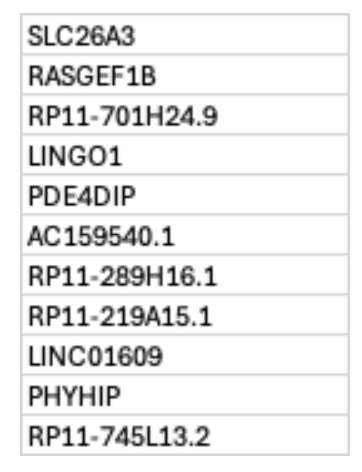

In [12]:
genes_of_interest = [
    'SLC26A3',
    'RASGEF1B',
    'RP11-701H24.9',
    'LINGO1',
    'PDE4DIP',
    'AC159540.1',
    'RP11-289H16.1',
    'RP11-219A15.1',
    'LINC01609',
    'PHYHIP',
    'RP11-745L13.2'
]

In [13]:
# Step 1: Create a mapping of gene_name to gene_id
if 'feature_name' in adata.var.columns:
    gene_mapping = dict(zip(adata.var['feature_name'], adata.var.index))
else:
    print("The dataset does not contain 'feature_name' in adata.var.")
    gene_mapping = {}

# Step 2: Find matched and unmatched genes
matched_genes = {gene: gene_mapping[gene] for gene in genes_of_interest if gene in gene_mapping}
unmatched_genes = [gene for gene in genes_of_interest if gene not in gene_mapping]

# Step 3: Report matched and unmatched genes
print("\nMatched Genes:")
for gene_name, gene_id in matched_genes.items():
    print(f"Gene Name: {gene_name}, Ensembl ID: {gene_id}")

if unmatched_genes:
    print(f"\nUnmatched Genes: {unmatched_genes}")
else:
    print("\nAll genes were successfully matched.")

# Step 4: Filter the dataset using matched Ensembl IDs
if matched_genes:
    filtered_data = adata[:, adata.var.index.isin(matched_genes.values())]
    print(f"\nFiltered dataset with {filtered_data.n_obs} cells and {filtered_data.n_vars} genes.")
else:
    print("\nNo matching genes found in the dataset.")
    filtered_data = None


Matched Genes:
Gene Name: SLC26A3, Ensembl ID: ENSG00000091138
Gene Name: RASGEF1B, Ensembl ID: ENSG00000138670
Gene Name: LINGO1, Ensembl ID: ENSG00000169783
Gene Name: PDE4DIP, Ensembl ID: ENSG00000178104
Gene Name: LINC01609, Ensembl ID: ENSG00000253103
Gene Name: PHYHIP, Ensembl ID: ENSG00000168490

Unmatched Genes: ['RP11-701H24.9', 'AC159540.1', 'RP11-289H16.1', 'RP11-219A15.1', 'RP11-745L13.2']

Filtered dataset with 23197 cells and 6 genes.


For a complete list of genes, please refer to week01 must read file "differential_expression_AD_Normal.csv". This list was retrieved from the Differential Expression top navigation menu on https://cellxgene.cziscience.com/differential-expression Links to an external site.

In [14]:
# Load genes
import pandas as pd

genes = pd.read_csv("differential_expression_AD_Normal.csv", comment="#")
genes.head()

,Gene,Log Fold Change,Effect Size,Adjusted P-Value
0,SLC26A3,1.246,3.958,0.0
1,RASGEF1B,2.178,3.855,0.0
2,RP11-701H24.9,1.044,3.396,0.0
3,LINGO1,1.797,2.873,0.0
4,PDE4DIP,1.276,2.671,0.0


Experiment and find the differences between the two cohorts in disease category (purple Alzheimer subject, green normal subject).

Write one page about your findings, e.g. which genes are upregulated in Alzheimer subjects, what are the differences between the two cohorts.


Objective
Compare gene expression between Alzheimer's disease (AD) and healthy subjects to identify differentially expressed genes.

Methodology

Data Preparation
Quality control and Filter the dataset based on disease category (e.g., "Alzheimer’s" vs. "Normal").

Sample Categorization
Classify into AD and control groups

Differential Expression Analysis
Identify significantly altered genes

Functional Analysis
Conduct GO enrichment and pathway analysis

Visualization
Generate plots to illustrate findings

Interpretation
Compare results with existing knowledge

Outcomes
List of altered genes and affected pathways

In [8]:
# Quality control and Filter the dataset into Alzheimer’s and normal cohorts
alz = adata[adata.obs['disease'] == 'Alzheimer disease']
normal = adata[adata.obs['disease'] == 'normal']

print(f"Alzheimer cohort: {alz.n_obs} cells")
print(f"Normal cohort: {normal.n_obs} cells")

# Summary statistics for each group
summary_stats = adata.obs.groupby('disease').describe()
print(summary_stats)

Alzheimer cohort: 11733 cells
Normal cohort: 11464 cells
                  nCount_RNA                                                   \
                       count         mean          std    min     25%     50%   
disease                                                                         
Alzheimer disease    11733.0  3153.810449  2020.378250  602.0  1613.0  2709.0   
normal               11464.0  5539.913555  3578.743099  601.0  2873.0  4744.0   

                                   nFeature_RNA               ... nCount_Exon  \
                      75%      max        count         mean  ...         75%   
disease                                                       ...               
Alzheimer disease  4170.0  20080.0      11733.0  1715.551607  ...     2061.00   
normal             7377.0  29487.0      11464.0  2501.750000  ...     2683.25   

                           nFeature_Exon                                  \
                       max         count         mean  

<ipython-input-8-102dfb36999d>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = adata.obs.groupby('disease').describe()


In [16]:
# Check the unique values in the 'disease' column
print(adata.obs['disease'].unique())

['Alzheimer disease', 'normal']
Categories (2, object): ['Alzheimer disease', 'normal']


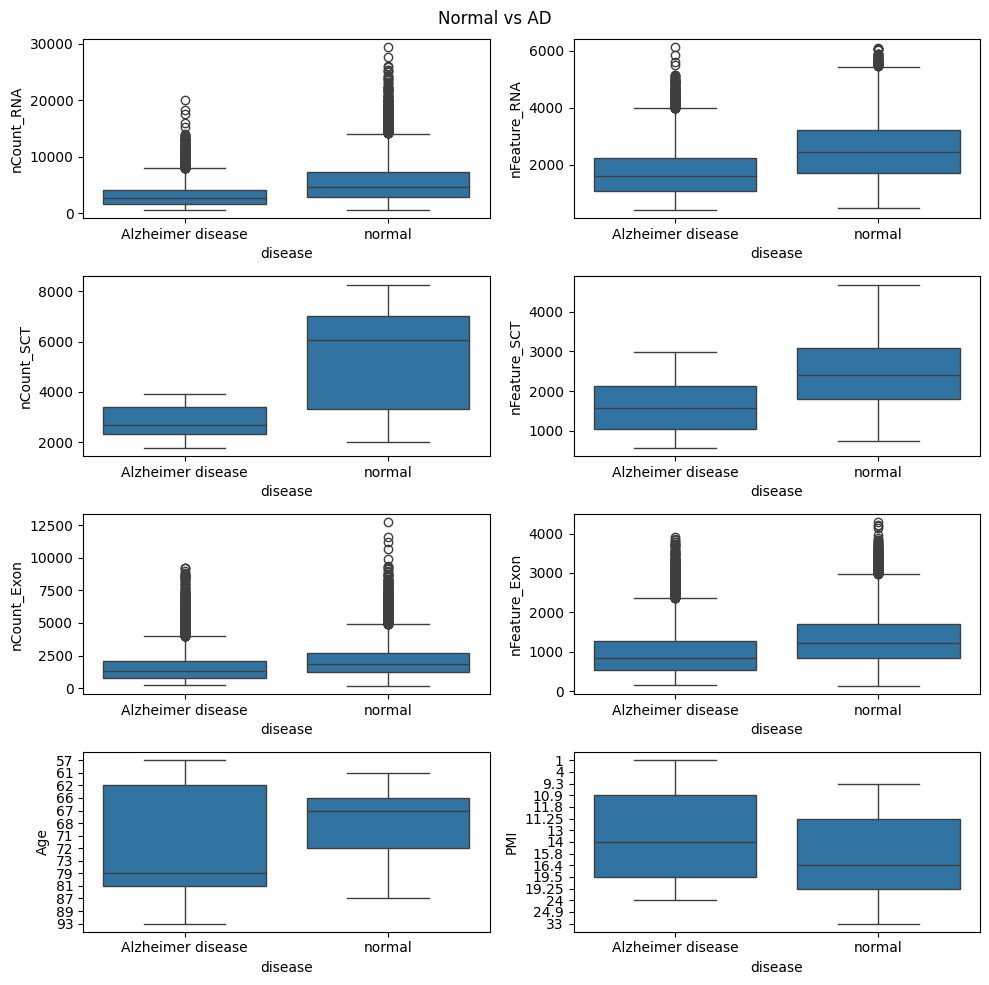

In [18]:
# Plotting AD vs Normal
fig, axs = plt.subplots(4,2, figsize=(10,10))
fig.suptitle('Normal vs AD')
sns.boxplot(ax=axs[0,0],x="disease", y="nCount_RNA", data=adata.obs)
sns.boxplot(ax=axs[0,1],x="disease", y="nFeature_RNA", data=adata.obs)

sns.boxplot(ax=axs[1,0],x="disease", y="nCount_SCT", data=adata.obs)
sns.boxplot(ax=axs[1,1],x="disease", y="nFeature_SCT", data=adata.obs)

sns.boxplot(ax=axs[2,0],x="disease", y="nCount_Exon", data=adata.obs)
sns.boxplot(ax=axs[2,1],x="disease", y="nFeature_Exon", data=adata.obs)

sns.boxplot(ax=axs[3,0],x="disease", y="Age", data=adata.obs)
sns.boxplot(ax=axs[3,1],x="disease", y="PMI", data=adata.obs)
plt.tight_layout()

<ipython-input-21-601c5150a8cb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  amyloid_disease_counts = adata.obs.groupby(['Amyloid', 'disease']).size().reset_index(name='count')


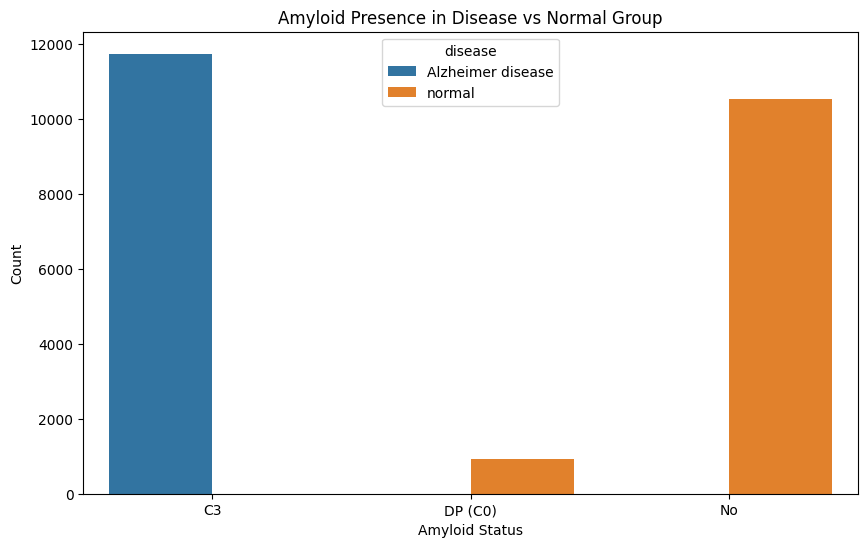

In [21]:
# Group by amyloid and disease status
amyloid_disease_counts = adata.obs.groupby(['Amyloid', 'disease']).size().reset_index(name='count')

# Bar plot: Amyloid Presence Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Amyloid', y='count', hue='disease', data=amyloid_disease_counts)
plt.title("Amyloid Presence in Disease vs Normal Group")
plt.xlabel("Amyloid Status")
plt.ylabel("Count")
plt.show()

<ipython-input-22-e42c4f71ae8c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  braak_disease_counts = adata.obs.groupby(['Braak', 'disease']).size().reset_index(name='count')


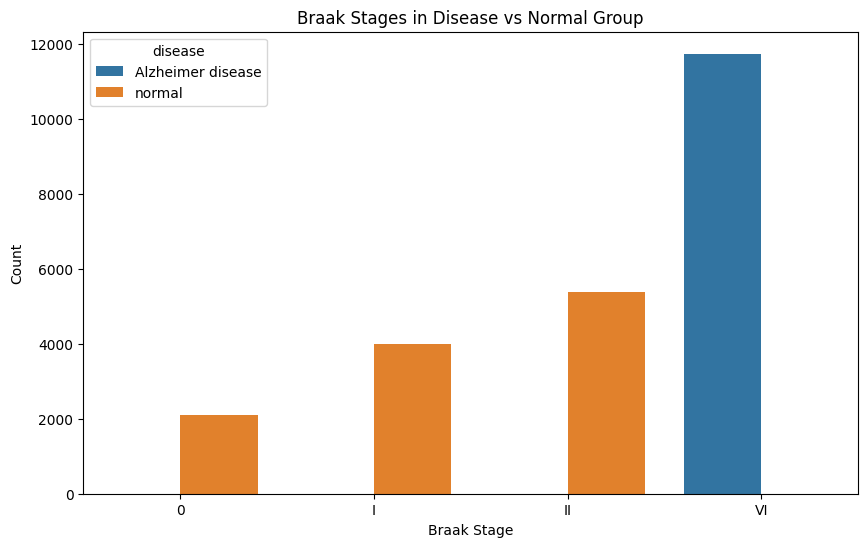

In [22]:
# Group by Braak stage and disease
braak_disease_counts = adata.obs.groupby(['Braak', 'disease']).size().reset_index(name='count')

# Bar plot: Braak Stages Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Braak', y='count', hue='disease', data=braak_disease_counts)
plt.title("Braak Stages in Disease vs Normal Group")
plt.xlabel("Braak Stage")
plt.ylabel("Count")
plt.show()

In [23]:
# Extract all columns from both cohorts
alz_df = alz.obs  # Alzheimer's cohort
normal_df = normal.obs  # Normal cohort

# Display the top rows of both dataframes
print("\nAlzheimer's Disease Data (All Columns):")
print(alz_df.head())

print("\nNormal Subjects Data (All Columns):")
print(normal_df.head())


Alzheimer's Disease Data (All Columns):
                          nCount_RNA  nFeature_RNA  percent.mt  SORT Amyloid  \
C0001_AAACGGGCAGTACACT-1       927.0           694    1.833873  MAP2      C3   
C0001_AAACGGGGTACCGTAT-1      1251.0           886    6.474820  MAP2      C3   
C0001_AAACGGGTCCAGAGGA-1      2972.0          1695    0.201884  MAP2      C3   
C0001_AAACGGGTCCTTCAAT-1      3619.0          1875    2.459243  MAP2      C3   
C0001_AAAGATGGTCAACATC-1      3931.0          2247    2.467566  MAP2      C3   

                         Age  RIN  nCount_SCT  nFeature_SCT  nCount_Exon  ...  \
C0001_AAACGGGCAGTACACT-1  73  5.7      2092.0           787        344.0  ...   
C0001_AAACGGGGTACCGTAT-1  73  5.7      2440.0           915        598.0  ...   
C0001_AAACGGGTCCAGAGGA-1  73  5.7      2949.0          1695        968.0  ...   
C0001_AAACGGGTCCTTCAAT-1  73  5.7      3269.0          1873       1442.0  ...   
C0001_AAAGATGGTCAACATC-1  73  5.7      3441.0          2246       1753.0 

In [24]:
from scipy.stats import mannwhitneyu

# Ensure PMI is numeric
adata.obs['PMI'] = adata.obs['PMI'].astype(float)

# Extract PMI values for both groups directly from adata.obs
pmi_alzheimer = adata.obs[adata.obs['disease'] == 'Alzheimer disease']['PMI']
pmi_normal = adata.obs[adata.obs['disease'] == 'normal']['PMI']

# Perform Mann-Whitney U test to compare the two distributions
stat, p_value = mannwhitneyu(pmi_alzheimer, pmi_normal, alternative='two-sided')

# Display the results
print(f"Mann-Whitney U Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation based on p-value
if p_value < 0.05:
    print("There is a statistically significant difference in PMI between the two groups.")
else:
    print("There is no statistically significant difference in PMI between the two groups.")

Mann-Whitney U Test Statistic: 49634070.0
P-value: 1.304733746392602e-264
There is a statistically significant difference in PMI between the two groups.


In [3]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

# Extract Alzheimer and Normal group masks
alzheimer_mask = adata.obs['disease'] == 'Alzheimer disease'
normal_mask = adata.obs['disease'] == 'normal'

# Efficiently extract data from sparse matrices without converting them to dense arrays
alzheimer_data = adata[alzheimer_mask].X
normal_data = adata[normal_mask].X

# Calculate mean expression across genes directly on sparse matrices
alzheimer_mean = np.array(alzheimer_data.mean(axis=0)).flatten()
normal_mean = np.array(normal_data.mean(axis=0)).flatten()

# Perform t-test using sparse matrix slices (convert slices to arrays on the fly)
t_stats, p_values = ttest_ind(
    alzheimer_data.A, normal_data.A, axis=0, equal_var=False
)

# Create DataFrame with results
gene_diff_df = pd.DataFrame({
    'Gene_ID': adata.var.index,
    'Gene_Name': adata.var['feature_name'].values,
    'Alzheimer_Expression': alzheimer_mean,
    'Normal_Expression': normal_mean,
    'Expression_Difference': alzheimer_mean - normal_mean,
    'p_value': p_values
})

# Add 'Significant' column and sort by expression difference
gene_diff_df['Significant'] = gene_diff_df['p_value'] < 0.05
gene_diff_df_sorted = gene_diff_df.sort_values(by='Expression_Difference', ascending=False)

# Display the top 10 differentially expressed genes
print("Top 10 Differentially Expressed Genes (Alzheimer - Normal):")
print(gene_diff_df_sorted.head(10)[['Gene_ID', 'Gene_Name', 'Expression_Difference', 'p_value']])

Top 10 Differentially Expressed Genes (Alzheimer - Normal):
               Gene_ID Gene_Name  Expression_Difference        p_value
31149  ENSG00000138670  RASGEF1B               0.889675   0.000000e+00
25420  ENSG00000251562    MALAT1               0.778301   0.000000e+00
7904   ENSG00000169783    LINGO1               0.721041   0.000000e+00
9136   ENSG00000102109    PCSK1N               0.484350   0.000000e+00
73     ENSG00000091138   SLC26A3               0.469875  1.484804e-276
29135  ENSG00000229807      XIST               0.458278  1.207143e-275
18049  ENSG00000198886    MT-ND4               0.405917  4.257354e-172
12189  ENSG00000111640     GAPDH               0.346562  2.051134e-140
20588  ENSG00000196199  MPHOSPH8               0.344825  4.907852e-175
24294  ENSG00000183337      BCOR               0.271217  2.965306e-225


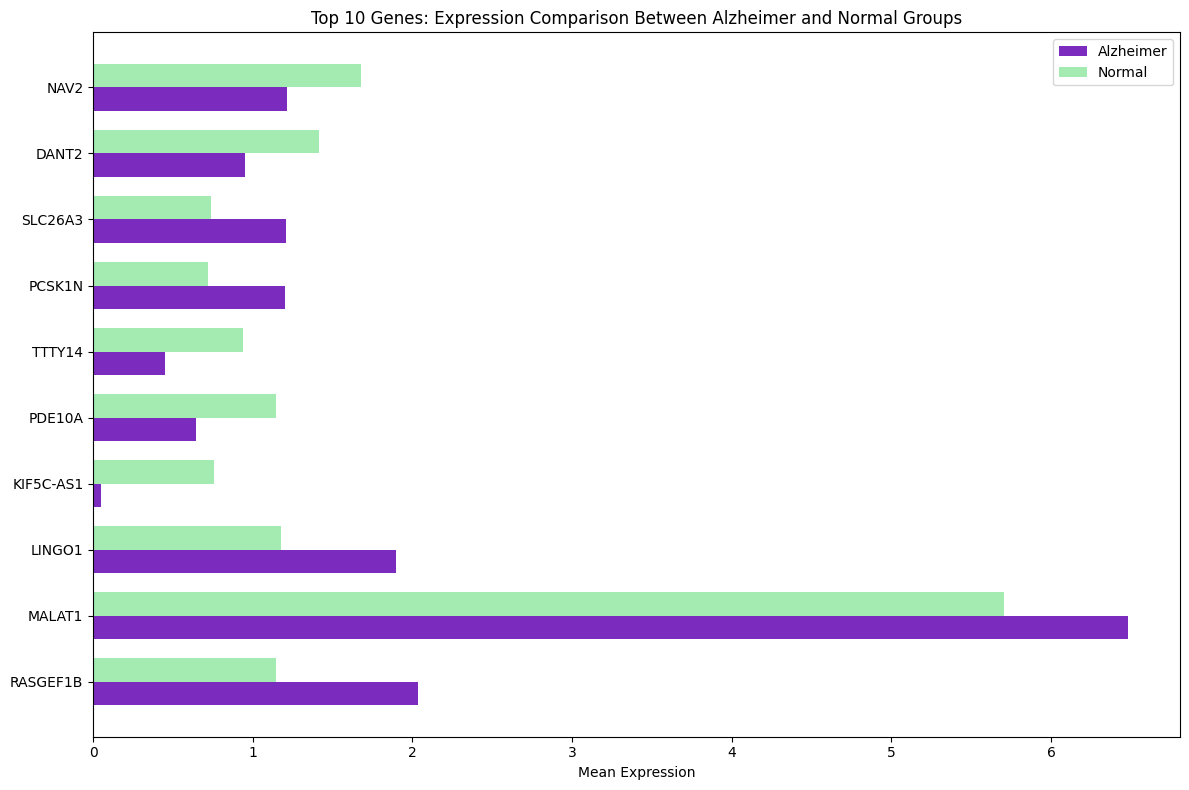

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Extract indices for Alzheimer and Normal groups
alzheimer_mask = adata.obs['disease'] == 'Alzheimer disease'
normal_mask = adata.obs['disease'] == 'normal'

# Step 2: Extract expression data
alzheimer_data = adata[alzheimer_mask].X
normal_data = adata[normal_mask].X

# Step 3: Calculate mean expression across genes
alz_mean = np.array(alzheimer_data.mean(axis=0)).flatten()
norm_mean = np.array(normal_data.mean(axis=0)).flatten()

# Step 4: Create DataFrame with gene expression results
results_df = pd.DataFrame({
    'Gene_ID': adata.var.index,
    'Gene_Name': adata.var['feature_name'].values,
    'Alzheimer_Expression': alz_mean,
    'Normal_Expression': norm_mean,
    'Expression_Difference': alz_mean - norm_mean
})

# Step 5: Sort the top 10 genes by absolute expression difference
top_10_genes = results_df.sort_values(by='Expression_Difference', key=abs, ascending=False).head(10)

# Step 6: Plotting the top 10 genes using horizontal bar plot
plt.figure(figsize=(12, 8))

bar_width = 0.35  # Width of the bars
y = np.arange(len(top_10_genes))  # Y positions for the bars

# Plot Alzheimer's expression (purple bars)
plt.barh(y - bar_width / 2, top_10_genes['Alzheimer_Expression'], bar_width,
         label='Alzheimer', color='#7B2CBF')

# Plot Normal expression (green bars)
plt.barh(y + bar_width / 2, top_10_genes['Normal_Expression'], bar_width,
         label='Normal', color='#A3EBB1')

# Add labels and title
plt.yticks(y, top_10_genes['Gene_Name'])
plt.xlabel('Mean Expression')
plt.title('Top 10 Genes: Expression Comparison Between Alzheimer and Normal Groups')
plt.legend(loc='upper right')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

In [6]:
# Check if highly related AD's gene is in the dataset, and return their gene name for clairy.
# List of gene IDs to check
gene_ids_to_check = ['ENSG00000130203', 'ENSG00000142192', 'ENSG00000080815', 'ENSG00000143801', 'ENSG00000134243', 'ENSG00000203710', 'ENSG00000151694', 'ENSG00000115825',
                     'ENSG00000071051']
#atom, app, epsen1, epsen2, sort1, cr1, adam 17, prkd3

# Check if the specified gene IDs exist in the dataset and retrieve their names
existing_genes = {
    gene_id: adata.var.loc[gene_id, 'feature_name']
    for gene_id in gene_ids_to_check if gene_id in adata.var.index
}

# Output the found genes and their corresponding names
print("Found Genes and Their Names:")
for gene_id, gene_name in existing_genes.items():
    print(f"Gene ID: {gene_id}, Gene Name: {gene_name}")

# Compare gene of interest expression level between disease and normal group
# Initialize results storage
results = []

# Compare expression levels for found genes
for gene_id in existing_genes:
    # Extract expression data for the gene from both groups
    gene_expression_alzheimer = adata[adata.obs['disease'] == 'Alzheimer disease', gene_id].X.toarray().flatten()
    gene_expression_normal = adata[adata.obs['disease'] == 'normal', gene_id].X.toarray().flatten()

    # Perform t-test to compare expression between groups
    t_stat, p_value = ttest_ind(gene_expression_alzheimer, gene_expression_normal, equal_var=False)

    # Store results
    results.append({
        'Gene_ID': gene_id,
        'Gene_Name': existing_genes[gene_id],
        'Alzheimer_Mean': np.mean(gene_expression_alzheimer),
        'Normal_Mean': np.mean(gene_expression_normal),
        'Expression_Difference': np.mean(gene_expression_alzheimer) - np.mean(gene_expression_normal),
        'p_value': p_value
    })

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print("\nComparison of Interest Genes Between Alzheimer and Normal Groups:")
print(results_df[['Gene_ID', 'Gene_Name', 'Alzheimer_Mean', 'Normal_Mean', 'Expression_Difference', 'p_value']])


Found Genes and Their Names:
Gene ID: ENSG00000130203, Gene Name: APOE
Gene ID: ENSG00000142192, Gene Name: APP
Gene ID: ENSG00000080815, Gene Name: PSEN1
Gene ID: ENSG00000143801, Gene Name: PSEN2
Gene ID: ENSG00000134243, Gene Name: SORT1
Gene ID: ENSG00000203710, Gene Name: CR1
Gene ID: ENSG00000151694, Gene Name: ADAM17
Gene ID: ENSG00000115825, Gene Name: PRKD3
Gene ID: ENSG00000071051, Gene Name: NCK2

Comparison of Interest Genes Between Alzheimer and Normal Groups:
           Gene_ID Gene_Name  Alzheimer_Mean  Normal_Mean  \
0  ENSG00000130203      APOE        0.037187     0.023479   
1  ENSG00000142192       APP        1.446663     1.664131   
2  ENSG00000080815     PSEN1        0.172117     0.259365   
3  ENSG00000143801     PSEN2        0.033041     0.053024   
4  ENSG00000134243     SORT1        0.283832     0.435645   
5  ENSG00000203710       CR1        0.002787     0.002928   
6  ENSG00000151694    ADAM17        0.209950     0.281025   
7  ENSG00000115825     PRKD3      


Top 20 Expressed Genes in Alzheimer's Disease:


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


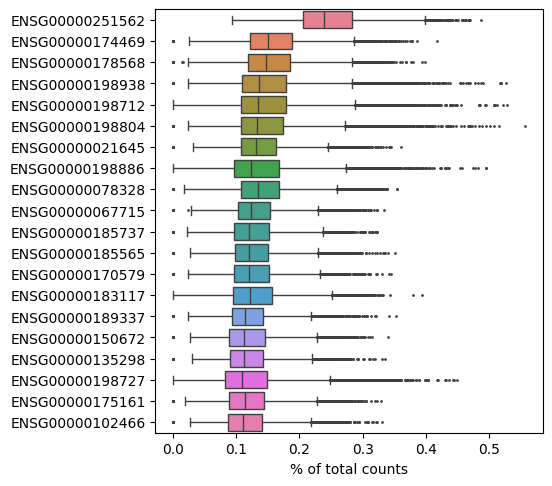


Top 20 Expressed Genes in Normal Group:


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


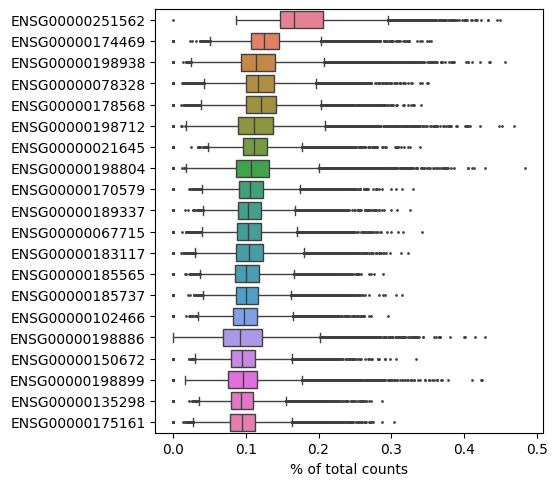

In [9]:
# Step 3: Plot the top 20 expressed genes for the Alzheimer’s group
print("\nTop 20 Expressed Genes in Alzheimer's Disease:")
scanpy.pl.highest_expr_genes(alz, n_top=20)

# Step 4: Plot the top 20 expressed genes for the Normal group
print("\nTop 20 Expressed Genes in Normal Group:")
scanpy.pl.highest_expr_genes(normal, n_top=20)

In [10]:
def get_top_genes(adata_group, n_top=20):
    """Extract top n expressed genes with gene IDs and names."""
    # Extract expression matrix and calculate mean expression
    expression_matrix = adata_group.X.toarray() if hasattr(adata_group.X, "toarray") else adata_group.X
    mean_expression = expression_matrix.mean(axis=0).flatten()

    # Create DataFrame with gene IDs, gene names, and mean expression
    top_genes = pd.DataFrame({
        'Gene_ID': adata_group.var.index,  # Ensembl Gene IDs
        'Gene_Name': adata_group.var['feature_name'].values,  # Gene names
        'Mean_Expression': mean_expression
    }).sort_values(by='Mean_Expression', ascending=False).head(n_top)

    return top_genes

# Step 3: Extract top 20 genes for each group
top_genes_alz = get_top_genes(alz, n_top=20)
top_genes_normal = get_top_genes(normal, n_top=20)

# Step 4: Display the top genes
print("\nTop 20 Expressed Genes in Alzheimer's Disease:")
print(top_genes_alz)

print("\nTop 20 Expressed Genes in Normal Group:")
print(top_genes_normal)
# Step 5: Compare the two lists of top genes
alz_genes = set(top_genes_alz['Gene_Name'])
normal_genes = set(top_genes_normal['Gene_Name'])

# Find common and unique genes between the two groups
common_genes = alz_genes.intersection(normal_genes)
unique_to_alz = alz_genes - normal_genes
unique_to_normal = normal_genes - alz_genes

# Step 6: Print the comparison results
print("\nCommon Genes in Both Groups:")
print(common_genes)

print("\nGenes Unique to Alzheimer's Disease:")
print(unique_to_alz)

print("\nGenes Unique to Normal Group:")
print(unique_to_normal)


Top 20 Expressed Genes in Alzheimer's Disease:
               Gene_ID Gene_Name  Mean_Expression
25420  ENSG00000251562    MALAT1         6.482939
272    ENSG00000174469   CNTNAP2         4.111829
12692  ENSG00000178568     ERBB4         3.922067
30959  ENSG00000198938    MT-CO3         3.814217
3895   ENSG00000198712    MT-CO2         3.796988
5717   ENSG00000198804    MT-CO1         3.750718
15651  ENSG00000021645     NRXN3         3.597956
9578   ENSG00000078328    RBFOX1         3.540910
18049  ENSG00000198886    MT-ND4         3.485741
13517  ENSG00000067715      SYT1         3.359105
14186  ENSG00000185737      NRG3         3.289230
28945  ENSG00000185565     LSAMP         3.277750
3251   ENSG00000170579    DLGAP1         3.267641
31354  ENSG00000183117     CSMD1         3.240309
1912   ENSG00000189337      KAZN         3.117237
20346  ENSG00000135298    ADGRB3         3.080381
11105  ENSG00000150672      DLG2         3.070164
25015  ENSG00000175161     CADM2         3.060259
18


Top 10 Upregulated Genes in 'Alzheimer disease':
0    RASGEF1B
1      LINGO1
2        XIST
3     SLC26A3
4      PCSK1N
5      MALAT1
6        GPS2
7        BCOR
8       USP39
9     ATP5F1D
Name: Alzheimer disease, dtype: object


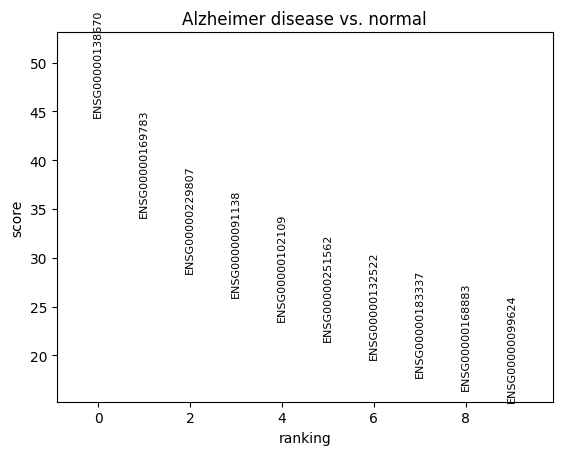

In [12]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Check if the data is already log-transformed
if not adata.raw:
    # Store the raw data (optional)
    adata.raw = adata

    # Step 2: Normalize and log-transform the data
    sc.pp.normalize_total(adata, target_sum=1e4)  # Normalize counts
    sc.pp.log1p(adata)  # Log-transform the normalized data

# Step 3: Perform differential expression analysis
sc.tl.rank_genes_groups(adata, groupby='disease', method='wilcoxon', reference='normal')

# Step 4: Extract the results using gene names from 'feature_name'
result = adata.uns['rank_genes_groups']

# Map gene IDs to gene names using 'feature_name'
gene_mapping = adata.var['feature_name'].to_dict()

# Convert gene IDs to gene names in the results
genes = pd.DataFrame({
    group: [gene_mapping[gene_id] for gene_id in result['names'][group]]
    for group in result['names'].dtype.names
})

# Display the top 10 upregulated genes for 'Alzheimer disease'
print("\nTop 10 Upregulated Genes in 'Alzheimer disease':")
print(genes['Alzheimer disease'].head(10))

# Step 5: Plot the top 10 differentially expressed genes
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False)


Top 10 Upregulated Genes in 'Alzheimer disease' (Sorted by Expression Difference):
               Gene_ID Gene_Name  Alzheimer_Expression  Normal_Expression  \
31149  ENSG00000138670  RASGEF1B              2.036063           1.146389   
25420  ENSG00000251562    MALAT1              6.482946           5.704646   
7904   ENSG00000169783    LINGO1              1.899747           1.178706   
9136   ENSG00000102109    PCSK1N              1.203231           0.718881   
73     ENSG00000091138   SLC26A3              1.210713           0.740838   
29135  ENSG00000229807      XIST              0.898673           0.440395   
18049  ENSG00000198886    MT-ND4              3.485747           3.079829   
12189  ENSG00000111640     GAPDH              1.285323           0.938761   
20588  ENSG00000196199  MPHOSPH8              1.358038           1.013213   
24294  ENSG00000183337      BCOR              0.453989           0.182772   

       Expression_Difference  
31149               0.889675  
25420 

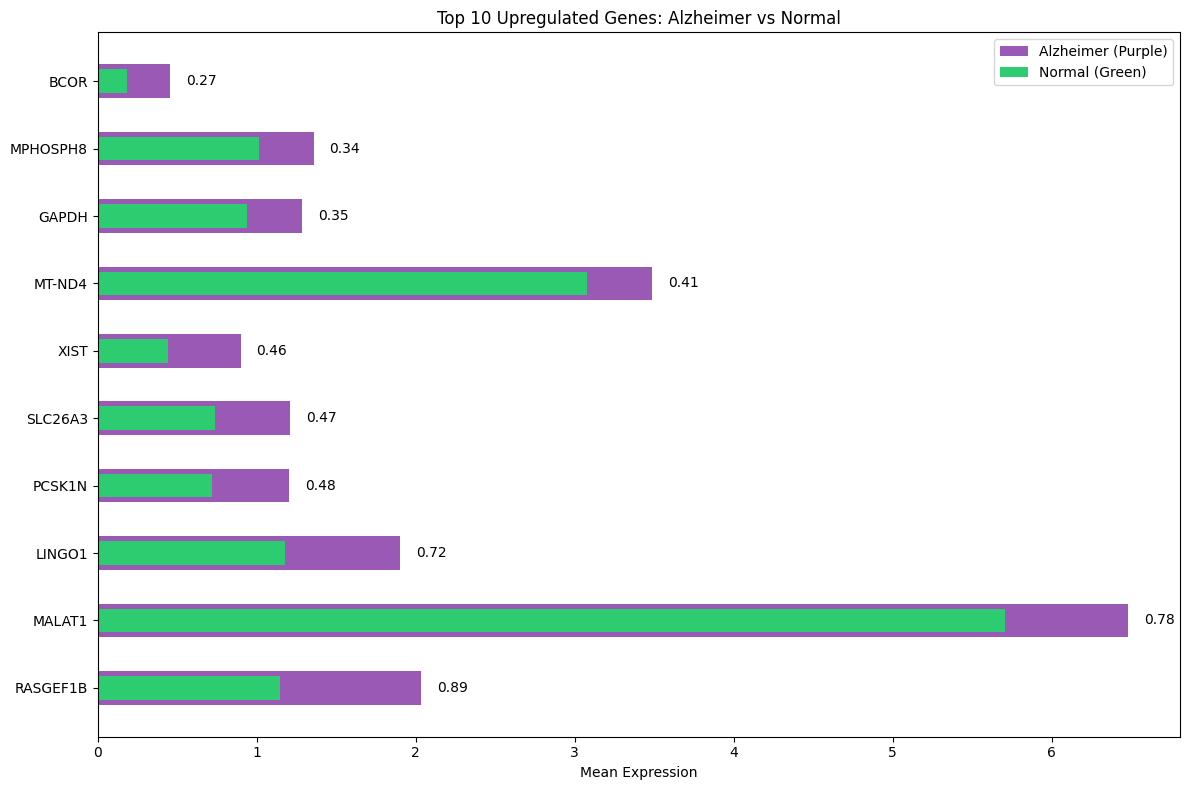

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Step 1: Extract Alzheimer and Normal group masks
alzheimer_mask = adata.obs['disease'] == 'Alzheimer disease'
normal_mask = adata.obs['disease'] == 'normal'

# Step 2: Extract gene expression data
alzheimer_data = adata[alzheimer_mask].X
normal_data = adata[normal_mask].X

# Step 3: Calculate mean expression per gene
alzheimer_mean = np.array(alzheimer_data.mean(axis=0)).flatten()
normal_mean = np.array(normal_data.mean(axis=0)).flatten()

# Step 4: Create a DataFrame with expression differences
gene_diff_df = pd.DataFrame({
    'Gene_ID': adata.var.index,
    'Gene_Name': adata.var['feature_name'].values,
    'Alzheimer_Expression': alzheimer_mean,
    'Normal_Expression': normal_mean,
    'Expression_Difference': alzheimer_mean - normal_mean
})

# Step 5: Filter and sort the top 10 upregulated genes by expression difference
upregulated_genes = gene_diff_df[gene_diff_df['Expression_Difference'] > 0]
top_10_upregulated = upregulated_genes.sort_values(
    by='Expression_Difference', ascending=False).head(10)

print("\nTop 10 Upregulated Genes in 'Alzheimer disease' (Sorted by Expression Difference):")
print(top_10_upregulated)

# Step 6: Plot the top 10 upregulated genes with differences
plt.figure(figsize=(12, 8))
y = range(len(top_10_upregulated))
bar_width = 0.5

# Plot bars for Alzheimer and Normal expression
plt.barh(y, top_10_upregulated['Alzheimer_Expression'],
         bar_width, color='#9B59B6', label='Alzheimer (Purple)')
plt.barh(y, top_10_upregulated['Normal_Expression'],
         bar_width * 0.7, color='#2ECC71', label='Normal (Green)')

# Add labels and title
plt.yticks(y, top_10_upregulated['Gene_Name'])
plt.xlabel('Mean Expression')
plt.title('Top 10 Upregulated Genes: Alzheimer vs Normal')
plt.legend(loc='upper right')

# Annotate the expression difference on the bars
for i, (idx, row) in enumerate(top_10_upregulated.iterrows()):
    plt.text(
        row['Alzheimer_Expression'] + 0.1, i,
        f"{row['Expression_Difference']:.2f}",
        va='center', ha='left', fontsize=10, color='black'
    )

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()



Top 10 Downregulated Genes in 'Alzheimer disease' (Sorted by Expression Difference):
               Gene_ID  Gene_Name  Alzheimer_Expression  Normal_Expression  \
16804  ENSG00000231079  KIF5C-AS1              0.048966           0.758985   
19126  ENSG00000112541     PDE10A              0.644609           1.148482   
31240  ENSG00000176728     TTTY14              0.450574           0.935754   
9801   ENSG00000235244      DANT2              0.949518           1.415307   
9510   ENSG00000166833       NAV2              1.214965           1.680465   
12637  ENSG00000165246     NLGN4Y              0.327282           0.776956   
12839  ENSG00000156113     KCNMA1              1.307709           1.745889   
25567  ENSG00000152217     SETBP1              1.084556           1.522186   
24575  ENSG00000155093     PTPRN2              1.323724           1.745034   
14227  ENSG00000261115   TMEM178B              1.248246           1.668023   

       Expression_Difference  
16804              -0.71

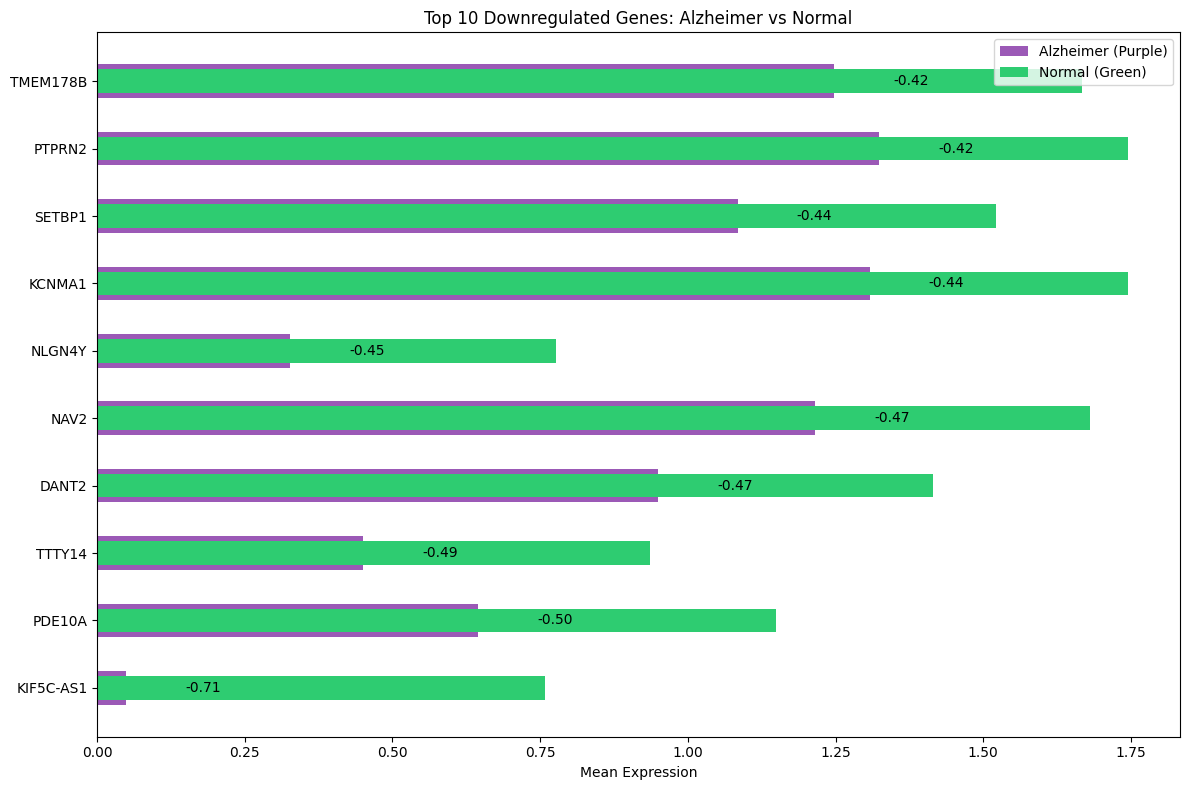

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Step 1: Extract Alzheimer and Normal group masks
alzheimer_mask = adata.obs['disease'] == 'Alzheimer disease'
normal_mask = adata.obs['disease'] == 'normal'

# Step 2: Extract gene expression data
alzheimer_data = adata[alzheimer_mask].X
normal_data = adata[normal_mask].X

# Step 3: Calculate mean expression per gene
alzheimer_mean = np.array(alzheimer_data.mean(axis=0)).flatten()
normal_mean = np.array(normal_data.mean(axis=0)).flatten()

# Step 4: Create a DataFrame with expression differences
gene_diff_df = pd.DataFrame({
    'Gene_ID': adata.var.index,
    'Gene_Name': adata.var['feature_name'].values,
    'Alzheimer_Expression': alzheimer_mean,
    'Normal_Expression': normal_mean,
    'Expression_Difference': alzheimer_mean - normal_mean
})

# Step 5: Filter and sort the top 10 downregulated genes by expression difference
downregulated_genes = gene_diff_df[gene_diff_df['Expression_Difference'] < 0]
top_10_downregulated = downregulated_genes.sort_values(
    by='Expression_Difference', ascending=True).head(10)

print("\nTop 10 Downregulated Genes in 'Alzheimer disease' (Sorted by Expression Difference):")
print(top_10_downregulated)

# Step 6: Plot the top 10 downregulated genes with differences
plt.figure(figsize=(12, 8))
y = range(len(top_10_downregulated))
bar_width = 0.5

# Plot bars for Alzheimer and Normal expression
plt.barh(y, top_10_downregulated['Alzheimer_Expression'],
         bar_width, color='#9B59B6', label='Alzheimer (Purple)')
plt.barh(y, top_10_downregulated['Normal_Expression'],
         bar_width * 0.7, color='#2ECC71', label='Normal (Green)')

# Add labels and title
plt.yticks(y, top_10_downregulated['Gene_Name'])
plt.xlabel('Mean Expression')
plt.title('Top 10 Downregulated Genes: Alzheimer vs Normal')
plt.legend(loc='upper right')

# Annotate the expression difference on the bars
for i, (idx, row) in enumerate(top_10_downregulated.iterrows()):
    plt.text(
        row['Alzheimer_Expression'] + 0.1, i,
        f"{row['Expression_Difference']:.2f}",
        va='center', ha='left', fontsize=10, color='black'
    )

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()



Matched Genes:
Gene Name: SLC26A3, Ensembl ID: ENSG00000091138
Gene Name: RASGEF1B, Ensembl ID: ENSG00000138670
Gene Name: LINGO1, Ensembl ID: ENSG00000169783
Gene Name: PDE4DIP, Ensembl ID: ENSG00000178104
Gene Name: LINC01609, Ensembl ID: ENSG00000253103
Gene Name: PHYHIP, Ensembl ID: ENSG00000168490

Unmatched Genes: ['RP11-701H24.9', 'AC159540.1', 'RP11-289H16.1', 'RP11-219A15.1', 'RP11-745L13.2']

Filtered dataset with 23197 cells and 6 genes.

Sorted Genes by Expression Difference (Descending Order):
   Gene_Name  Alzheimer_avg  Normal_avg  Expression_Difference
1   RASGEF1B       2.036063    1.146389               0.889675
2     LINGO1       1.899747    1.178706               0.721041
0    SLC26A3       1.210713    0.740838               0.469875
5     PHYHIP       0.498769    0.445409               0.053359
4  LINC01609       0.021722    0.013426               0.008296
3    PDE4DIP       1.301821    1.623394              -0.321573


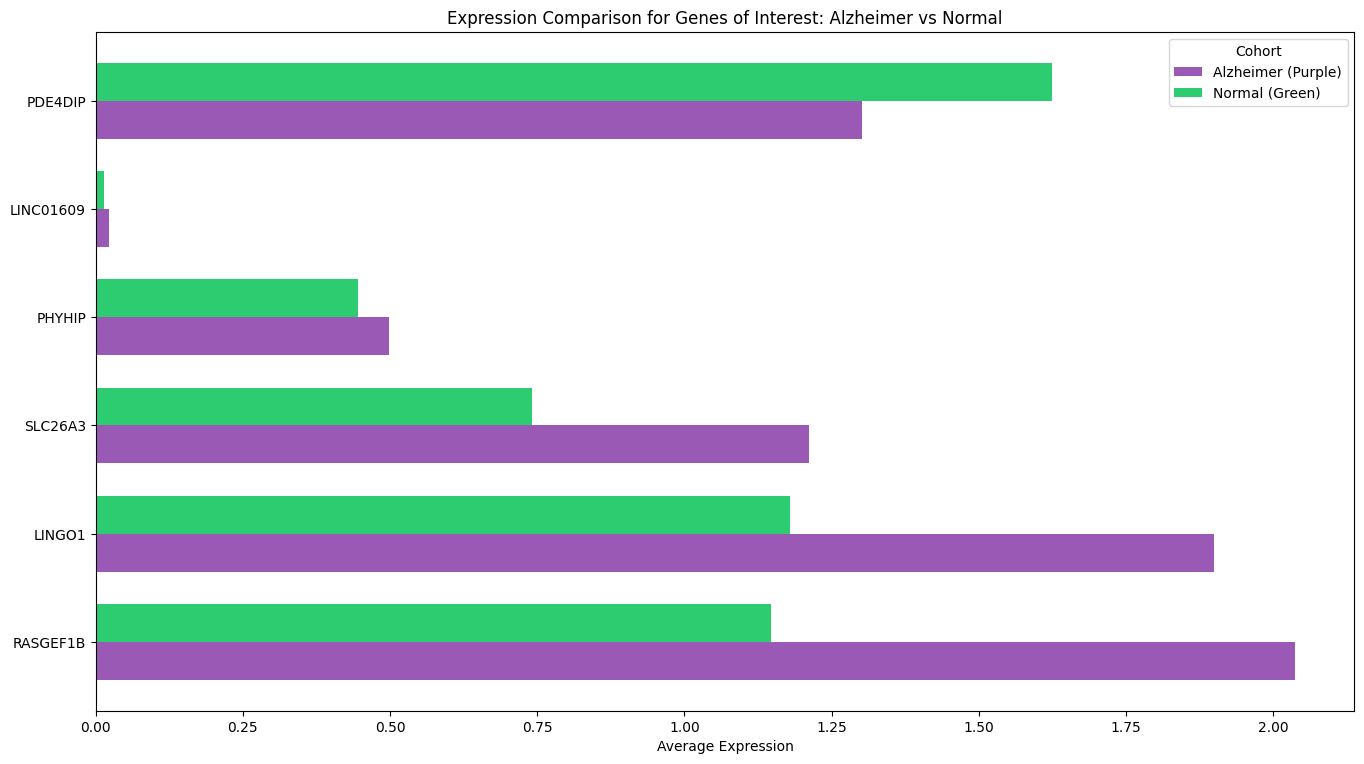

In [15]:
# Genes of Interest: Difference between Disease vs. Normal
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'genes_of_interest' contains the list of genes you want to analyze
genes_of_interest = [
    'SLC26A3', 'RASGEF1B', 'RP11-701H24.9', 'LINGO1', 'PDE4DIP',
    'AC159540.1', 'RP11-289H16.1', 'RP11-219A15.1',
    'LINC01609', 'PHYHIP', 'RP11-745L13.2'
]

# Step 1: Create a mapping of gene_name to gene_id
if 'feature_name' in adata.var.columns:
    gene_mapping = dict(zip(adata.var['feature_name'], adata.var.index))
else:
    raise ValueError("The dataset does not contain 'feature_name' in adata.var.")

# Step 2: Match genes of interest with gene IDs in the dataset
matched_genes = {gene: gene_mapping[gene] for gene in genes_of_interest if gene in gene_mapping}
unmatched_genes = [gene for gene in genes_of_interest if gene not in gene_mapping]

print("\nMatched Genes:")
for gene_name, gene_id in matched_genes.items():
    print(f"Gene Name: {gene_name}, Ensembl ID: {gene_id}")

if unmatched_genes:
    print(f"\nUnmatched Genes: {unmatched_genes}")
else:
    print("\nAll genes were successfully matched.")

# Step 3: Filter the dataset using matched gene IDs
if matched_genes:
    filtered_data = adata[:, list(matched_genes.values())]
    print(f"\nFiltered dataset with {filtered_data.n_obs} cells and {filtered_data.n_vars} genes.")
else:
    raise ValueError("No matching genes found in the dataset.")

# Step 4: Calculate mean expression for each gene in Alzheimer and Normal groups
alzheimer_mask = adata.obs['disease'] == 'Alzheimer disease'
normal_mask = adata.obs['disease'] == 'normal'

alzheimer_avg_expr = np.array(filtered_data[alzheimer_mask].X.mean(axis=0)).flatten()
normal_avg_expr = np.array(filtered_data[normal_mask].X.mean(axis=0)).flatten()

# Step 5: Create DataFrame with gene names and expression values
result_df = pd.DataFrame({
    'Gene_Name': list(matched_genes.keys()),
    'Alzheimer_avg': alzheimer_avg_expr,
    'Normal_avg': normal_avg_expr,
    'Expression_Difference': alzheimer_avg_expr - normal_avg_expr
})

# Step 6: Sort the DataFrame by Expression Difference (Descending)
result_df = result_df.sort_values(by='Expression_Difference', ascending=False)

# Display the sorted DataFrame to confirm values match the expected table
print("\nSorted Genes by Expression Difference (Descending Order):")
print(result_df)

# Step 7: Visualize the expression comparison between Alzheimer and Normal expression levels
plt.figure(figsize=(14, 8))
y = np.arange(len(result_df))
bar_width = 0.35  # Adjusted for better spacing

# Plot bars for Alzheimer and Normal expression
plt.barh(y - bar_width/2, result_df['Alzheimer_avg'], bar_width, color='#9B59B6', label='Alzheimer (Purple)')
plt.barh(y + bar_width/2, result_df['Normal_avg'], bar_width, color='#2ECC71', label='Normal (Green)')

# Add labels and title
plt.yticks(y, result_df['Gene_Name'])
plt.xlabel('Average Expression')
plt.title('Expression Comparison for Genes of Interest: Alzheimer vs Normal')
plt.legend(title='Cohort', loc='upper right')

# Adjust layout to prevent clipping
plt.tight_layout(pad=2)

# Display the plot
plt.show()



Matched Genes:
Gene Name: SLC26A3, Ensembl ID: ENSG00000091138
Gene Name: RASGEF1B, Ensembl ID: ENSG00000138670
Gene Name: LINGO1, Ensembl ID: ENSG00000169783
Gene Name: PDE4DIP, Ensembl ID: ENSG00000178104
Gene Name: LINC01609, Ensembl ID: ENSG00000253103
Gene Name: PHYHIP, Ensembl ID: ENSG00000168490

Unmatched Genes: ['RP11-701H24.9', 'AC159540.1', 'RP11-289H16.1', 'RP11-219A15.1', 'RP11-745L13.2']

Top Upregulated Genes:
   Gene_Name  Alzheimer_avg  Normal_avg  Expression_Difference
1   RASGEF1B       2.036063    1.146389               0.889675
2     LINGO1       1.899747    1.178706               0.721041
0    SLC26A3       1.210713    0.740838               0.469875
5     PHYHIP       0.498769    0.445409               0.053359
4  LINC01609       0.021722    0.013426               0.008296


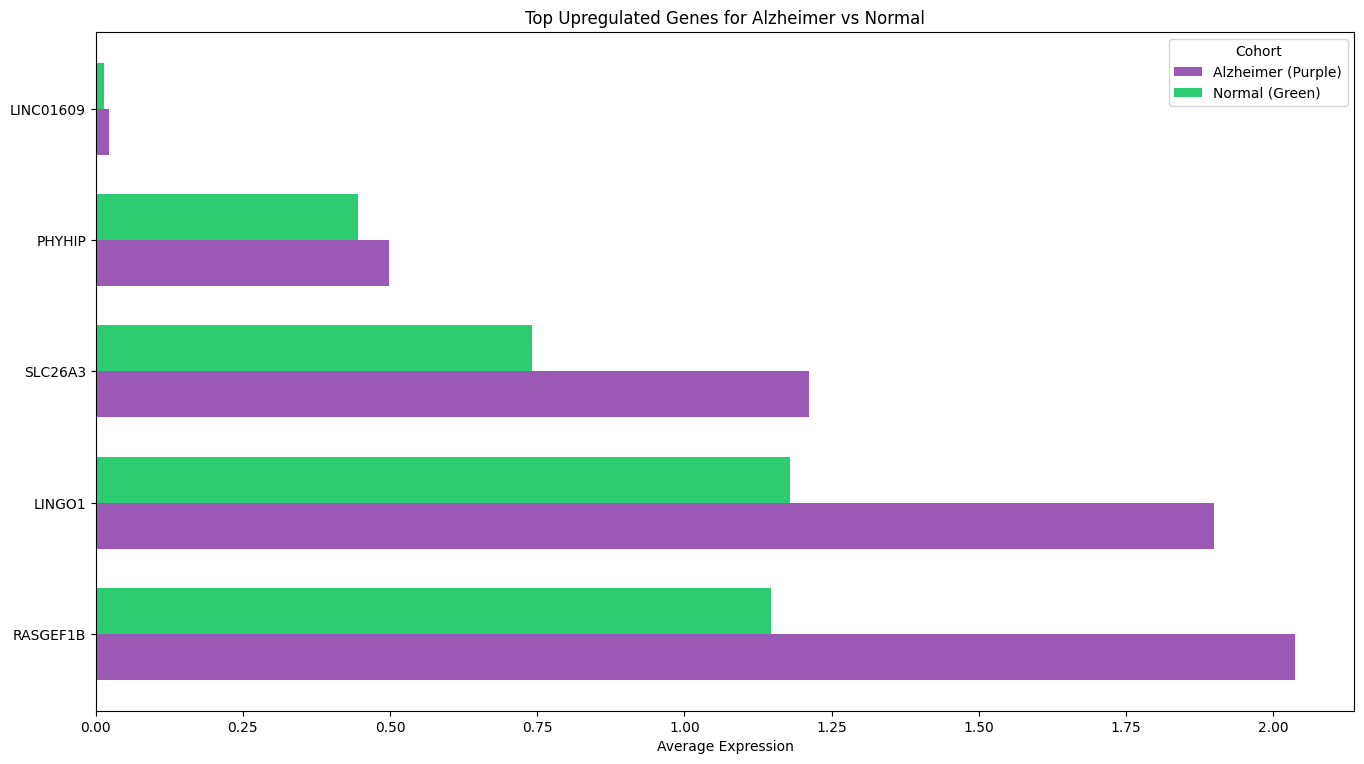


Top Downregulated Genes:
  Gene_Name  Alzheimer_avg  Normal_avg  Expression_Difference
3   PDE4DIP       1.301821    1.623394              -0.321573


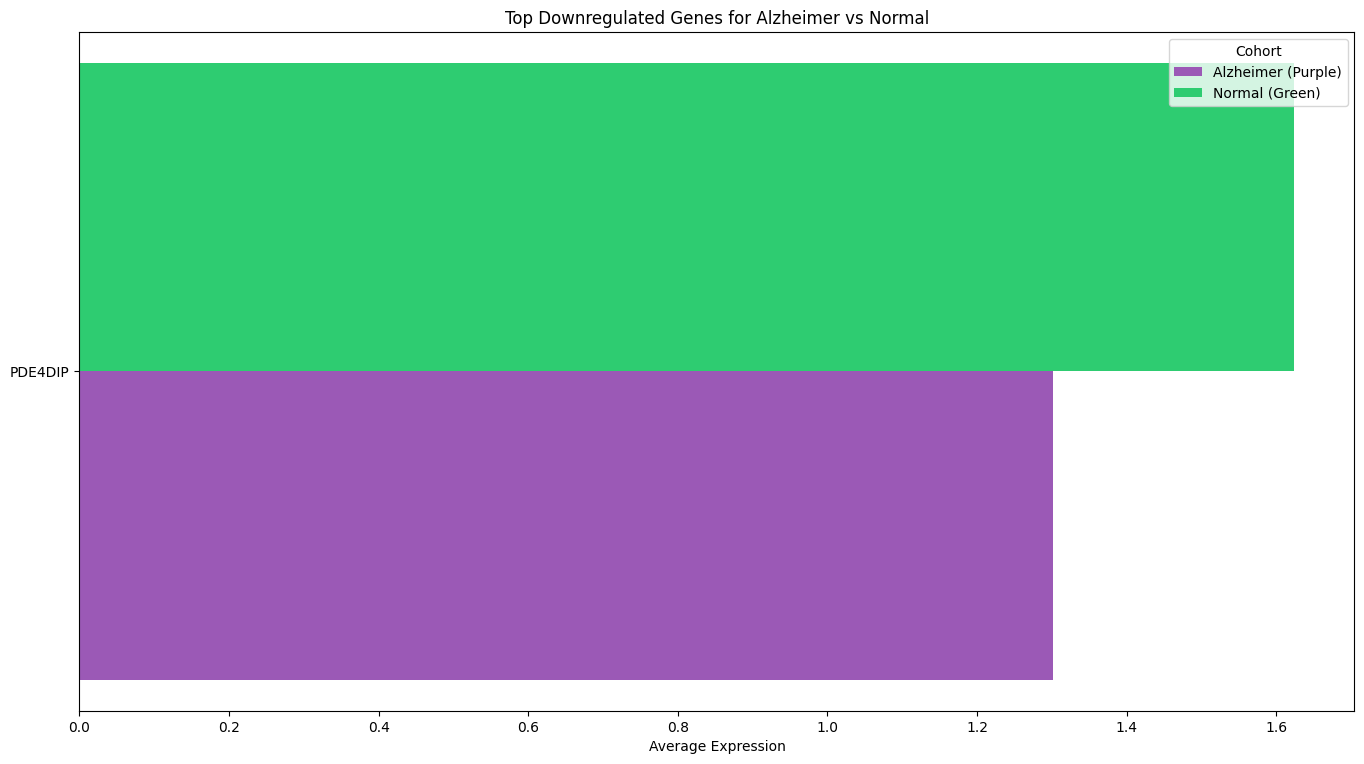

In [16]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure 'genes_of_interest' contains the list of genes you want to analyze
genes_of_interest = [
    'SLC26A3', 'RASGEF1B', 'RP11-701H24.9', 'LINGO1', 'PDE4DIP',
    'AC159540.1', 'RP11-289H16.1', 'RP11-219A15.1',
    'LINC01609', 'PHYHIP', 'RP11-745L13.2'
]

# Step 1: Create a mapping of gene_name to gene_id
if 'feature_name' in adata.var.columns:
    gene_mapping = dict(zip(adata.var['feature_name'], adata.var.index))
else:
    raise ValueError("The dataset does not contain 'feature_name' in adata.var.")

# Step 2: Match genes of interest with gene IDs in the dataset
matched_genes = {gene: gene_mapping[gene] for gene in genes_of_interest if gene in gene_mapping}
unmatched_genes = [gene for gene in genes_of_interest if gene not in gene_mapping]

print("\nMatched Genes:")
for gene_name, gene_id in matched_genes.items():
    print(f"Gene Name: {gene_name}, Ensembl ID: {gene_id}")

if unmatched_genes:
    print(f"\nUnmatched Genes: {unmatched_genes}")
else:
    print("\nAll genes were successfully matched.")

# Step 3: Filter the dataset using matched gene IDs
filtered_data = adata[:, list(matched_genes.values())]

# Step 4: Calculate mean expression for each gene in Alzheimer and Normal groups
alzheimer_mask = adata.obs['disease'] == 'Alzheimer disease'
normal_mask = adata.obs['disease'] == 'normal'

alzheimer_avg_expr = np.array(filtered_data[alzheimer_mask].X.mean(axis=0)).flatten()
normal_avg_expr = np.array(filtered_data[normal_mask].X.mean(axis=0)).flatten()

# Step 5: Create DataFrame with gene names and expression values
result_df = pd.DataFrame({
    'Gene_Name': list(matched_genes.keys()),
    'Alzheimer_avg': alzheimer_avg_expr,
    'Normal_avg': normal_avg_expr,
    'Expression_Difference': alzheimer_avg_expr - normal_avg_expr
})

# Step 6: Separate Upregulated and Downregulated Genes
upregulated_genes = result_df[result_df['Expression_Difference'] > 0].sort_values(
    by='Expression_Difference', ascending=False
)
downregulated_genes = result_df[result_df['Expression_Difference'] < 0].sort_values(
    by='Expression_Difference', ascending=True
)

# Plotting function for a given set of genes
def plot_genes(genes_df, title):
    plt.figure(figsize=(14, 8))
    y = np.arange(len(genes_df))
    bar_width = 0.35

    # Plot bars for Alzheimer and Normal expression
    plt.barh(y - bar_width / 2, genes_df['Alzheimer_avg'], bar_width, color='#9B59B6', label='Alzheimer (Purple)')
    plt.barh(y + bar_width / 2, genes_df['Normal_avg'], bar_width, color='#2ECC71', label='Normal (Green)')

    # Add labels and title
    plt.yticks(y, genes_df['Gene_Name'])
    plt.xlabel('Average Expression')
    plt.title(title)
    plt.legend(title='Cohort', loc='upper right')

    # Adjust layout to prevent clipping
    plt.tight_layout(pad=2)
    plt.show()

# Step 7: Visualize Upregulated Genes
print("\nTop Upregulated Genes:")
print(upregulated_genes)
plot_genes(upregulated_genes, 'Top Upregulated Genes for Alzheimer vs Normal')

# Step 8: Visualize Downregulated Genes
print("\nTop Downregulated Genes:")
print(downregulated_genes)
plot_genes(downregulated_genes, 'Top Downregulated Genes for Alzheimer vs Normal')


Experiment with subjects of different ages

(57 - 89) in development_stage category.

In [17]:
import re
# Check the unique development stages to confirm their format
unique_stages = adata.obs['development_stage'].unique()
print("Development Stages (Ages):", unique_stages)
# Count the number of subjects in each development stage
stage_counts = adata.obs['development_stage'].value_counts()

# Sort the counts by development stage in ascending order
stage_counts_sorted = stage_counts.sort_index()

# Print the sorted distribution
print("\nDistribution of Subjects Across Development Stages (Ascending Order):")
print(stage_counts_sorted)

# Function to extract the numerical part from the development stage
def extract_age(stage):
    match = re.search(r'\d+', stage)  # Extract the first number from the string
    return int(match.group()) if match else None  # Handle missing numbers

# Extract ages from 'development_stage'
adata.obs['age'] = adata.obs['development_stage'].apply(extract_age)

# Create 'Younger' (≤ 70 years) and 'Older' (> 70 years) groups
adata.obs['age_group'] = adata.obs['age'].apply(
    lambda x: 'Younger' if x is not None and x <= 70 else 'Older'
)

# Count the number of subjects in each group
age_group_counts = adata.obs['age_group'].value_counts()

# Print the distribution of subjects across the two age groups
print("\nDistribution of Subjects Across Age Groups:")
print(age_group_counts)

Development Stages (Ages): ['73-year-old stage', '62-year-old stage', '57-year-old stage', '81-year-old stage', '79-year-old stage', ..., '87-year-old stage', '72-year-old stage', '66-year-old stage', '68-year-old stage', '71-year-old stage']
Length: 14
Categories (14, object): ['80 year-old and over stage', '57-year-old stage', '61-year-old stage',
                          '62-year-old stage', ..., '79-year-old stage', '81-year-old stage',
                          '87-year-old stage', '89-year-old stage']

Distribution of Subjects Across Development Stages (Ascending Order):
development_stage
80 year-old and over stage    1061
57-year-old stage             1608
61-year-old stage             2429
62-year-old stage             2183
66-year-old stage             1899
67-year-old stage             1769
68-year-old stage              960
71-year-old stage             1254
72-year-old stage             2097
73-year-old stage             1440
79-year-old stage             2172
81-year-old 


Any Missing Ages:
Empty DataFrame
Columns: [nCount_RNA, nFeature_RNA, percent.mt, SORT, Amyloid, Age, RIN, nCount_SCT, nFeature_SCT, nCount_Exon, nFeature_Exon, PMI, Braak, Sample.ID, Cell.Types, tissue_ontology_term_id, assay_ontology_term_id, disease_ontology_term_id, cell_type_ontology_term_id, development_stage_ontology_term_id, self_reported_ethnicity_ontology_term_id, sex_ontology_term_id, is_primary_data, organism_ontology_term_id, donor_id, suspension_type, tissue_type, cell_type, assay, disease, organism, sex, tissue, self_reported_ethnicity, development_stage, observation_joinid, age, age_group]
Index: []

[0 rows x 38 columns]

Extracted Ages (Correctly Sorted by Age):
                                   development_stage age
C0005_ACACTGATCTTGTCAT-1           57-year-old stage  57
C0021_ACTGAACCACGTCTCT-1           61-year-old stage  61
C0003_ACGAGCCTCTCTTATG-1           62-year-old stage  62
C0076_ATTTCACGTCAAGGCA-1           66-year-old stage  66
C0034_CCGTACTAGCAGGTCA-1 

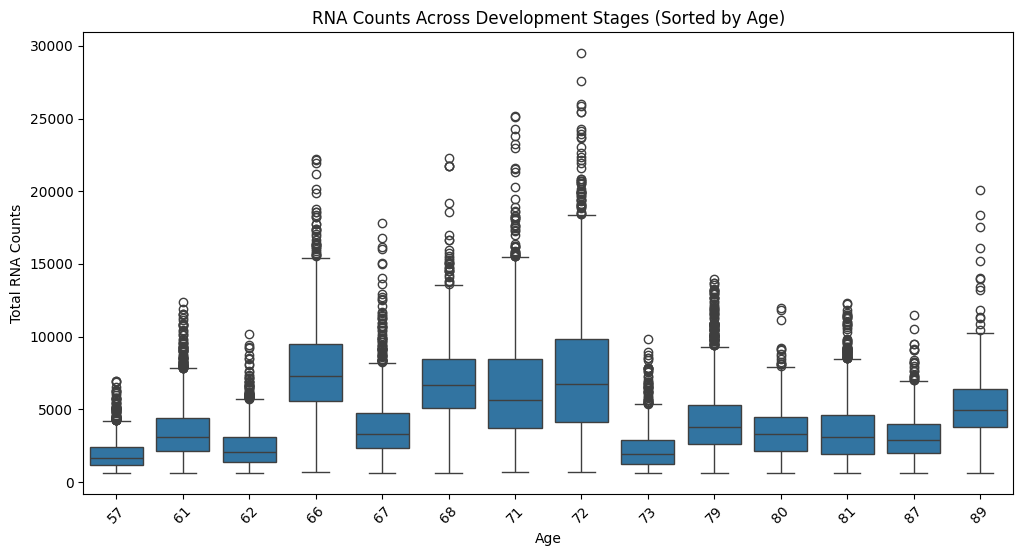

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Function to extract numerical age and handle the '80 year-old and over stage'
def extract_age(stage):
    if "80 year-old and over" in stage:
        return 80  # Treat as 80 but reorder it
    match = re.search(r'\d+', stage)  # Extract the first number found
    return int(match.group()) if match else None

# Extract numerical ages from 'development_stage'
adata.obs['age'] = adata.obs['development_stage'].apply(extract_age)

# Check for any NaN values and print them if found (to debug issues)
print("\nAny Missing Ages:")
print(adata.obs[adata.obs['age'].isna()])

# Create a helper column to ensure '80 year-old and over' ranks after 79
adata.obs['sort_order'] = adata.obs.apply(
    lambda row: row['age'] + 0.1 if row['development_stage'] == '80 year-old and over stage' else row['age'],
    axis=1
)

# Sort the DataFrame using the helper column
sorted_obs = adata.obs.sort_values(by='sort_order')

# Verify the result to ensure ages are sorted correctly
print("\nExtracted Ages (Correctly Sorted by Age):")
print(sorted_obs[['development_stage', 'age']].drop_duplicates())

# Sort the AnnData object based on the corrected order
adata_sorted = adata[sorted_obs.index]

# Extract unique ages in the correct order as a list for plotting
age_order = sorted(sorted_obs['age'].unique())  # Ensure it's sorted correctly

# Plot 1: RNA Counts Across Development Stages (Sorted by Age)
plt.figure(figsize=(12, 6))
sns.boxplot(x='age', y='nCount_RNA', data=adata_sorted.obs, order=age_order)
plt.title("RNA Counts Across Development Stages (Sorted by Age)")
plt.xlabel("Age")
plt.ylabel("Total RNA Counts")
plt.xticks(rotation=45)
plt.show()

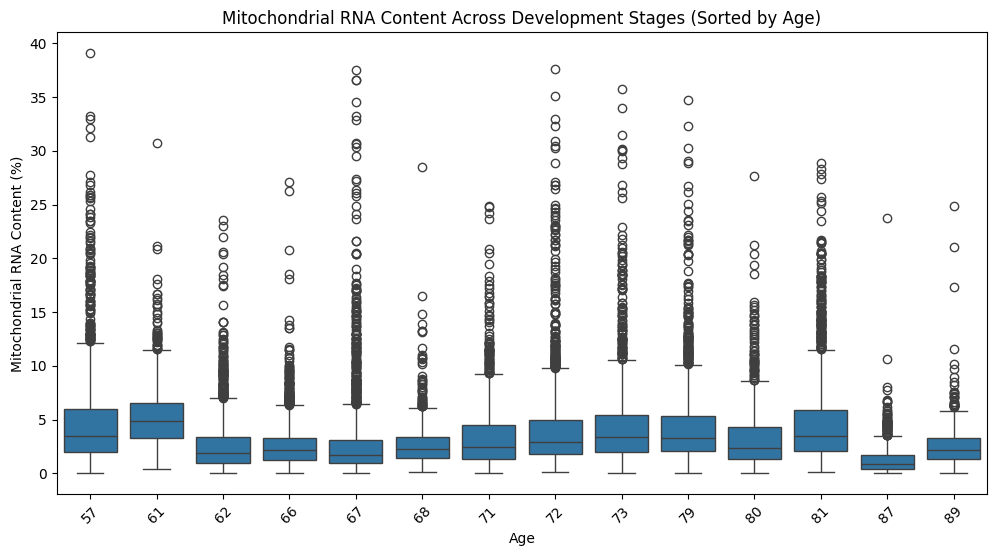

In [19]:
# Plot 2: Mitochondrial RNA Content Across Development Stages (Sorted by Age)
plt.figure(figsize=(12, 6))
sns.boxplot(x='age', y='percent.mt', data=adata_sorted.obs, order=age_order)
plt.title("Mitochondrial RNA Content Across Development Stages (Sorted by Age)")
plt.xlabel("Age")
plt.ylabel("Mitochondrial RNA Content (%)")
plt.xticks(rotation=45)
plt.show()

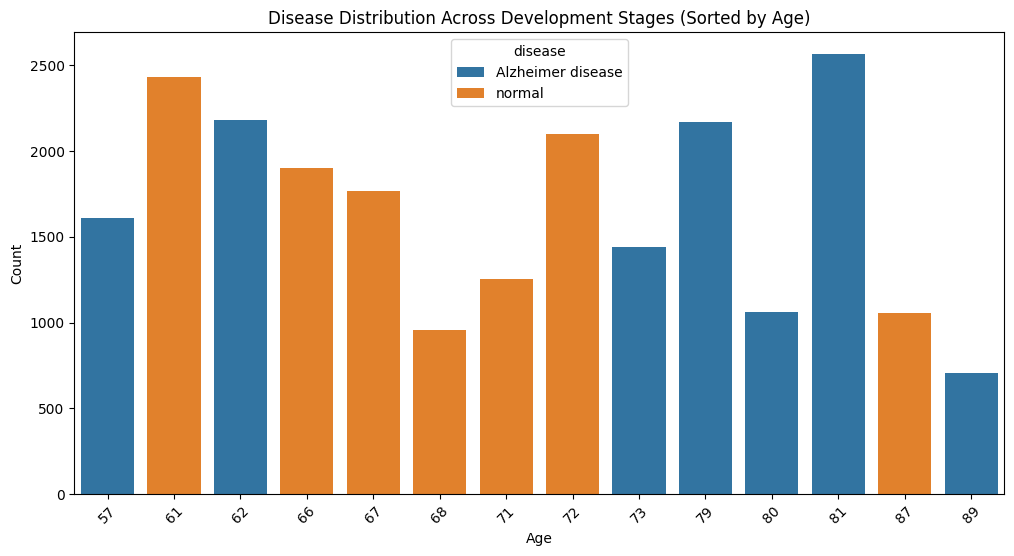

In [20]:
# Plot 3: Disease Distribution Across Development Stages (Sorted by Age)
plt.figure(figsize=(12, 6))
sns.countplot(x='age', hue='disease', data=adata_sorted.obs, order=age_order)
plt.title("Disease Distribution Across Development Stages (Sorted by Age)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

<ipython-input-21-3bc9a3f92fac>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_analysis = adata.obs.groupby(['age_group', 'disease']).agg(



Age Group Analysis by Disease:
  age_group            disease  mean_mt_proportion  std_mt_proportion  \
0     Older  Alzheimer disease            4.131075           3.665149   
1     Older             normal            3.267967           3.565111   
2   Younger  Alzheimer disease            3.578375           3.808168   
3   Younger             normal            3.619000           3.141447   

   mean_RNA_count  std_RNA_count  
0     3611.309872    2155.271961  
1     6140.349898    4126.952639  
2     2195.366658    1243.123323  
3     5164.949270    3131.391040  


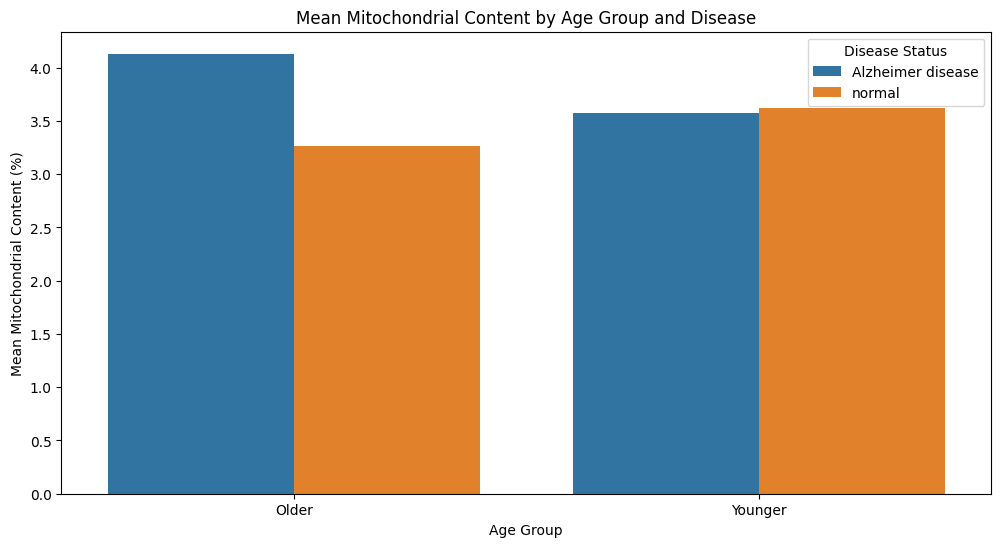

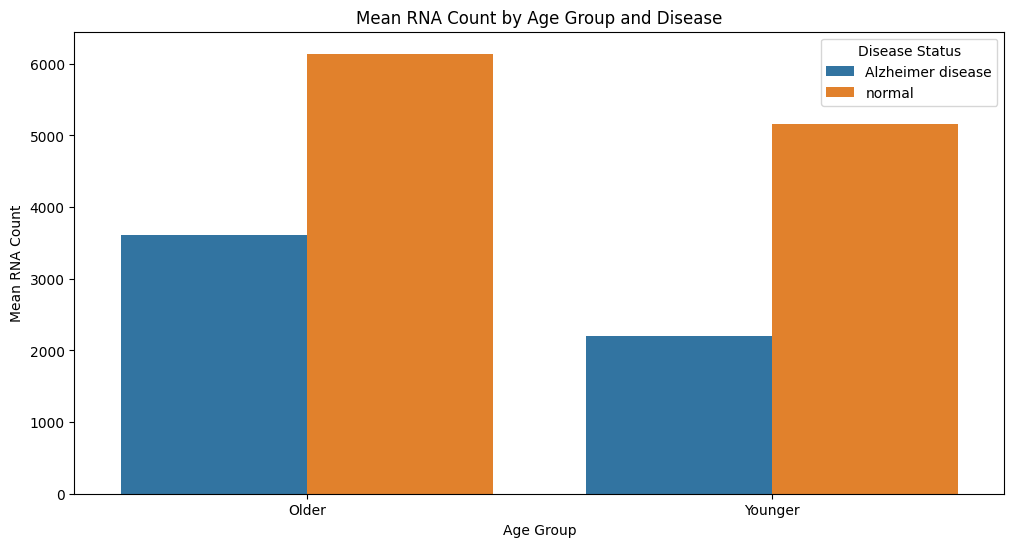

In [21]:
# Perform group-by analysis for each age group and disease
age_group_analysis = adata.obs.groupby(['age_group', 'disease']).agg(
    mean_mt_proportion=('percent.mt', 'mean'),
    std_mt_proportion=('percent.mt', 'std'),
    mean_RNA_count=('nCount_RNA', 'mean'),
    std_RNA_count=('nCount_RNA', 'std')
).reset_index()

# Display the summary statistics
print("\nAge Group Analysis by Disease:")
print(age_group_analysis)

# Save the summary statistics to a CSV file
age_group_analysis.to_csv('age_group_analysis_by_disease.csv', index=False)

# Plot 1: Mean Mitochondrial Content by Age Group and Disease
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='mean_mt_proportion', hue='disease', data=age_group_analysis)
plt.title("Mean Mitochondrial Content by Age Group and Disease")
plt.xlabel("Age Group")
plt.ylabel("Mean Mitochondrial Content (%)")
plt.legend(title="Disease Status")
plt.show()

# Plot 2: Mean RNA Count by Age Group and Disease
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='mean_RNA_count', hue='disease', data=age_group_analysis)
plt.title("Mean RNA Count by Age Group and Disease")
plt.xlabel("Age Group")
plt.ylabel("Mean RNA Count")
plt.legend(title="Disease Status")
plt.show()

<ipython-input-22-a06b41723822>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby(['age_group', 'disease'])



Disease Distribution by Age Group with Percentages:
  age_group            disease  count  total  proportion  percentage
0     Older  Alzheimer disease   7942  12349    0.643129   64.312900
1     Older             normal   4407  12349    0.356871   35.687100
2   Younger  Alzheimer disease   3791  10848    0.349465   34.946534
3   Younger             normal   7057  10848    0.650535   65.053466


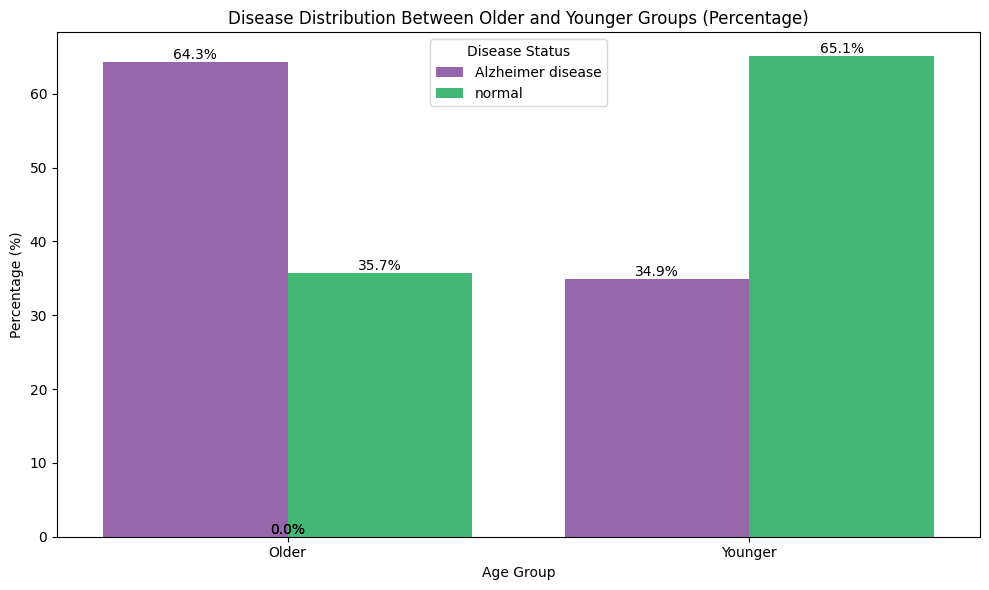

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group data by age group and disease
disease_distribution = (
    adata.obs.groupby(['age_group', 'disease'])
    .size()
    .reset_index(name='count')
)

# Step 2: Calculate total counts for each age group to compute proportions
disease_distribution['total'] = disease_distribution.groupby('age_group')['count'].transform('sum')
disease_distribution['proportion'] = disease_distribution['count'] / disease_distribution['total']

# Step 3: Calculate percentage instead of proportion
disease_distribution['percentage'] = (disease_distribution['count'] / disease_distribution['total']) * 100

# Step 4: Display the grouped data with percentages
print("\nDisease Distribution by Age Group with Percentages:")
print(disease_distribution)

# Step 5: Plot the Disease Distribution with Custom Colors (Purple & Green)
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='age_group', y='percentage', hue='disease', data=disease_distribution,
    palette={"Alzheimer disease": "#9B59B6", "normal": "#2ECC71"}  # Purple and Green
)

# Add title and labels
plt.title("Disease Distribution Between Older and Younger Groups (Percentage)")
plt.xlabel("Age Group")
plt.ylabel("Percentage (%)")
plt.legend(title="Disease Status")

# Step 6: Add percentage labels on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()

In [23]:
from scipy.stats import chi2_contingency
# Group the data by age group and disease
disease_distribution = adata.obs.groupby(['age_group', 'disease'], observed=True).size().reset_index(name='count')


# Create a contingency table
contingency_table = disease_distribution.pivot(index='age_group', columns='disease', values='count').fillna(0)

# Perform the Chi-square test for independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results of the Chi-square test
print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

# Determine significance
alpha = 0.05  # Common significance level
if p < alpha:
    print("There is a significant difference in disease distribution between younger and older groups.")
else:
    print("There is no significant difference in disease distribution between younger and older groups.")

Chi-square Statistic: 1991.1882932912936
P-value: 0.0
Degrees of Freedom: 1
There is a significant difference in disease distribution between younger and older groups.


<ipython-input-24-57c81fd0d9a5>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_disease_sorted, x='Expression_Difference', y='Gene', palette='Purples', ax=axes[0])
<ipython-input-24-57c81fd0d9a5>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_normal_sorted, x='Expression_Difference', y='Gene', palette='Greens', ax=axes[1])


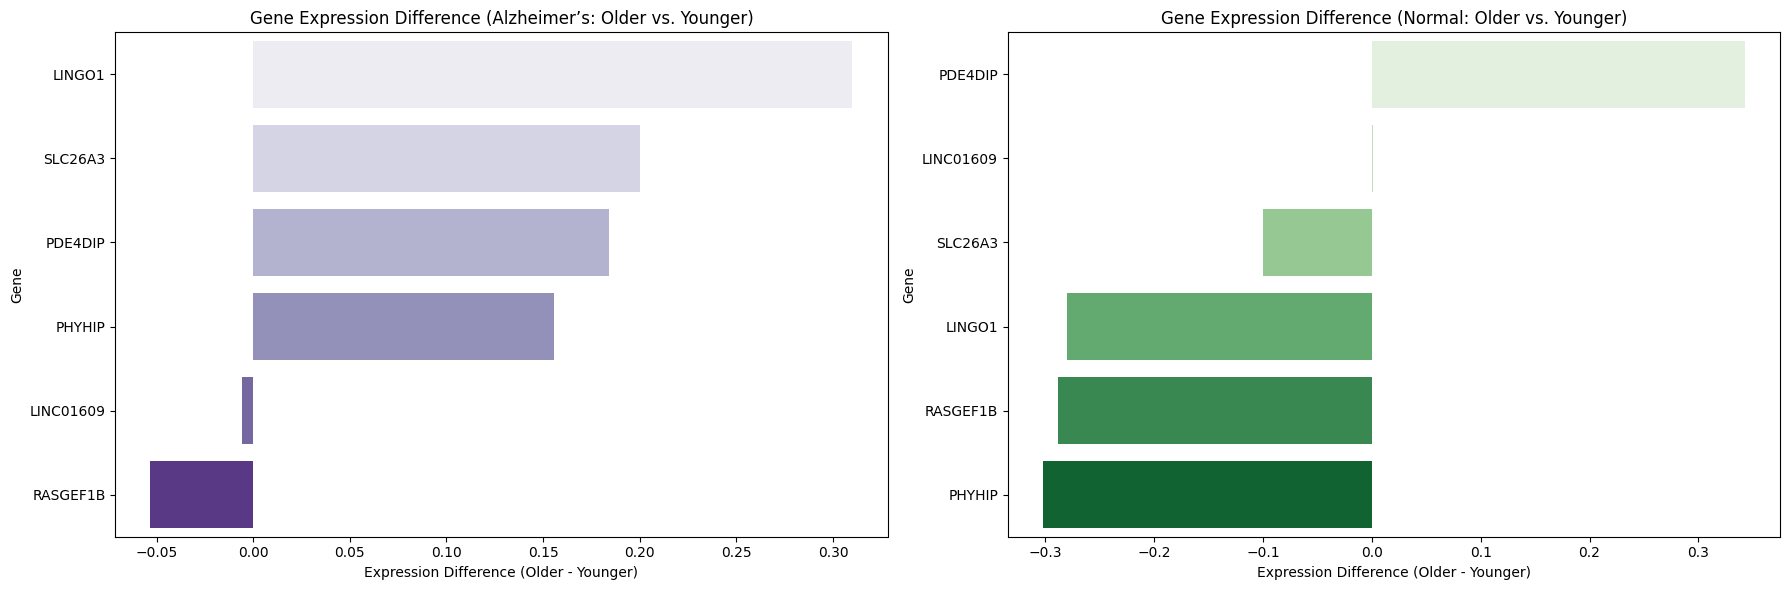


Alzheimer’s Group: Gene Expression Differences (Older vs. Younger):
        Gene  Younger_Expression  Older_Expression  Expression_Difference
2     LINGO1            1.689891          1.999923               0.310032
0    SLC26A3            1.075239          1.275384               0.200145
3    PDE4DIP            1.177243          1.361290               0.184047
5     PHYHIP            0.393345          0.549091               0.155746
4  LINC01609            0.025799          0.019776              -0.006023
1   RASGEF1B            2.072089          2.018872              -0.053217

Normal Group: Gene Expression Differences (Older vs. Younger):
        Gene  Younger_Expression  Older_Expression  Expression_Difference
3    PDE4DIP            1.491635          1.834370               0.342735
4  LINC01609            0.013053          0.014023               0.000970
0    SLC26A3            0.779424          0.679052              -0.100372
2     LINGO1            1.286256          1.006487   

In [24]:
# Step 1: Define Genes of Interest
genes_of_interest = ['SLC26A3', 'RASGEF1B', 'LINGO1', 'PDE4DIP', 'LINC01609', 'PHYHIP']

# Step 2: Create a mapping of gene_name to gene_id
if 'feature_name' in adata.var.columns:
    gene_mapping = dict(zip(adata.var['feature_name'], adata.var.index))
else:
    raise ValueError("The dataset does not contain 'feature_name' in adata.var.")

# Step 3: Match genes of interest with gene IDs in the dataset
matched_genes = {gene: gene_mapping[gene] for gene in genes_of_interest if gene in gene_mapping}
if not matched_genes:
    raise ValueError("No matching genes found in the dataset.")

# Step 4: Initialize List to Store Results for Both Disease and Normal Groups
results_disease, results_normal = [], []

# Step 5: Loop Through Genes and Calculate Mean Expression by Age Group
for gene_name, gene_id in matched_genes.items():
    # Alzheimer’s group by age
    disease_group = adata[(adata.obs['disease'] == 'Alzheimer disease')]
    younger_disease = disease_group[disease_group.obs['age_group'] == 'Younger', gene_id]
    older_disease = disease_group[disease_group.obs['age_group'] == 'Older', gene_id]

    # Normal group by age
    normal_group = adata[adata.obs['disease'] == 'normal']
    younger_normal = normal_group[normal_group.obs['age_group'] == 'Younger', gene_id]
    older_normal = normal_group[normal_group.obs['age_group'] == 'Older', gene_id]

    # Calculate mean expression values for both groups and age differences
    mean_young_dis = younger_disease.X.mean() if younger_disease.shape[0] > 0 else 0
    mean_old_dis = older_disease.X.mean() if older_disease.shape[0] > 0 else 0
    diff_dis = mean_old_dis - mean_young_dis

    mean_young_norm = younger_normal.X.mean() if younger_normal.shape[0] > 0 else 0
    mean_old_norm = older_normal.X.mean() if older_normal.shape[0] > 0 else 0
    diff_norm = mean_old_norm - mean_young_norm

    # Store the results
    results_disease.append([gene_name, mean_young_dis, mean_old_dis, diff_dis])
    results_normal.append([gene_name, mean_young_norm, mean_old_norm, diff_norm])

# Step 6: Convert Results to DataFrames and Sort by Expression Difference
df_disease = pd.DataFrame(results_disease, columns=['Gene', 'Younger_Expression', 'Older_Expression', 'Expression_Difference'])
df_normal = pd.DataFrame(results_normal, columns=['Gene', 'Younger_Expression', 'Older_Expression', 'Expression_Difference'])

df_disease_sorted = df_disease.sort_values(by='Expression_Difference', ascending=False)
df_normal_sorted = df_normal.sort_values(by='Expression_Difference', ascending=False)

# Step 7: Plot the Sorted Expression Differences for Disease and Normal Groups
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for Alzheimer's Disease Group (Purple Palette)
sns.barplot(data=df_disease_sorted, x='Expression_Difference', y='Gene', palette='Purples', ax=axes[0])
axes[0].set_title("Gene Expression Difference (Alzheimer’s: Older vs. Younger)")
axes[0].set_xlabel("Expression Difference (Older - Younger)")
axes[0].set_ylabel("Gene")

# Plot for Normal Group (Green Palette)
sns.barplot(data=df_normal_sorted, x='Expression_Difference', y='Gene', palette='Greens', ax=axes[1])
axes[1].set_title("Gene Expression Difference (Normal: Older vs. Younger)")
axes[1].set_xlabel("Expression Difference (Older - Younger)")
axes[1].set_ylabel("Gene")

plt.tight_layout()
plt.show()

# Step 8: Display the Results
print("\nAlzheimer’s Group: Gene Expression Differences (Older vs. Younger):")
print(df_disease_sorted)

print("\nNormal Group: Gene Expression Differences (Older vs. Younger):")
print(df_normal_sorted)

<ipython-input-25-d9b17c8b2bea>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x='Expression_Difference', y='Gene', palette='coolwarm')


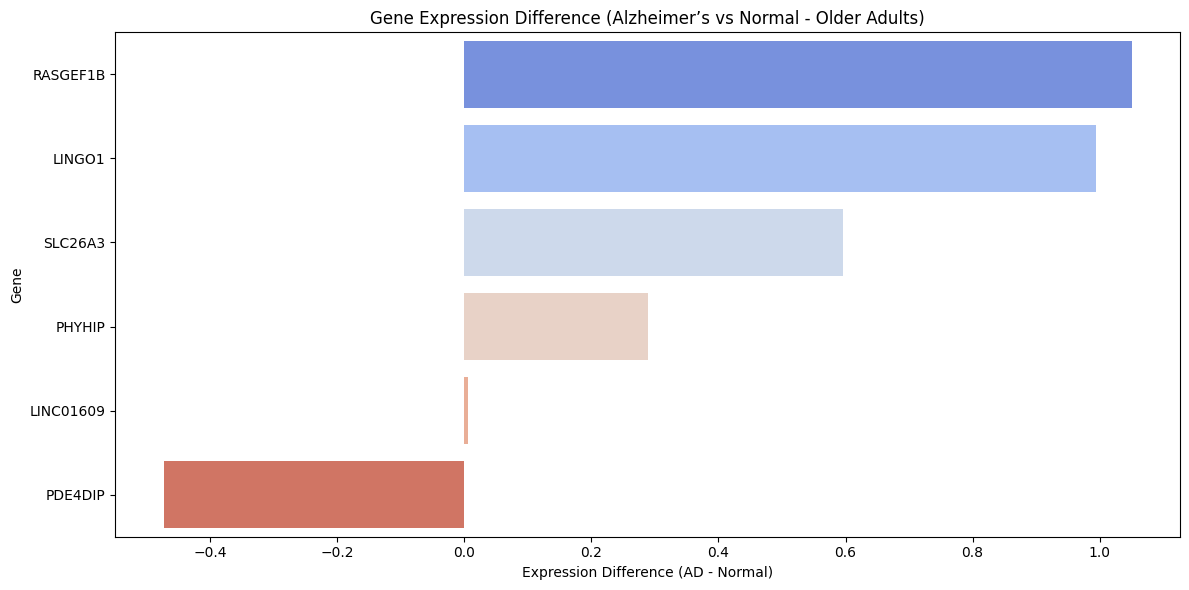


AD vs Normal Gene Differences (Older Adults):
        Gene  AD_Expression  Normal_Expression  Expression_Difference
1   RASGEF1B       2.018872           0.968655               1.050217
2     LINGO1       1.999923           1.006487               0.993435
0    SLC26A3       1.275384           0.679052               0.596332
5     PHYHIP       0.549091           0.259401               0.289690
4  LINC01609       0.019776           0.014023               0.005753
3    PDE4DIP       1.361290           1.834370              -0.473080


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define genes of interest
genes_of_interest = ['SLC26A3', 'RASGEF1B', 'LINGO1', 'PDE4DIP', 'LINC01609', 'PHYHIP']

# Step 1: Filter data for older adults in AD and normal groups
older_AD = adata[(adata.obs['age_group'] == 'Older') & (adata.obs['disease'] == 'Alzheimer disease')]
older_normal = adata[(adata.obs['age_group'] == 'Older') & (adata.obs['disease'] == 'normal')]

# Step 2: Extract gene IDs from feature names
gene_mapping = {gene: adata.var[adata.var['feature_name'] == gene].index[0] for gene in genes_of_interest}

# Step 3: Calculate mean expression for each gene in AD and normal groups
results = []
for gene_name, gene_id in gene_mapping.items():
    ad_expr = older_AD[:, gene_id].X.mean() if older_AD.shape[0] > 0 else 0
    normal_expr = older_normal[:, gene_id].X.mean() if older_normal.shape[0] > 0 else 0
    expr_diff = ad_expr - normal_expr  # Calculate the expression difference (AD - Normal)

    # Store results
    results.append([gene_name, ad_expr, normal_expr, expr_diff])

# Step 4: Create DataFrame with results
df = pd.DataFrame(results, columns=['Gene', 'AD_Expression', 'Normal_Expression', 'Expression_Difference'])

# Step 5: Sort by expression difference for visualization
df_sorted = df.sort_values(by='Expression_Difference', ascending=False)

# Step 6: Plot the expression differences
plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted, x='Expression_Difference', y='Gene', palette='coolwarm')

# Customize plot
plt.title('Gene Expression Difference (Alzheimer’s vs Normal - Older Adults)')
plt.xlabel('Expression Difference (AD - Normal)')
plt.ylabel('Gene')

# Display plot and DataFrame
plt.tight_layout()
plt.show()

print("\nAD vs Normal Gene Differences (Older Adults):")
print(df_sorted)

Experiment with gender cohorts (sex = male vs. female)

<ipython-input-27-e0510e044f18>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  / gender_disease_distribution.groupby('sex')['count'].transform('sum')


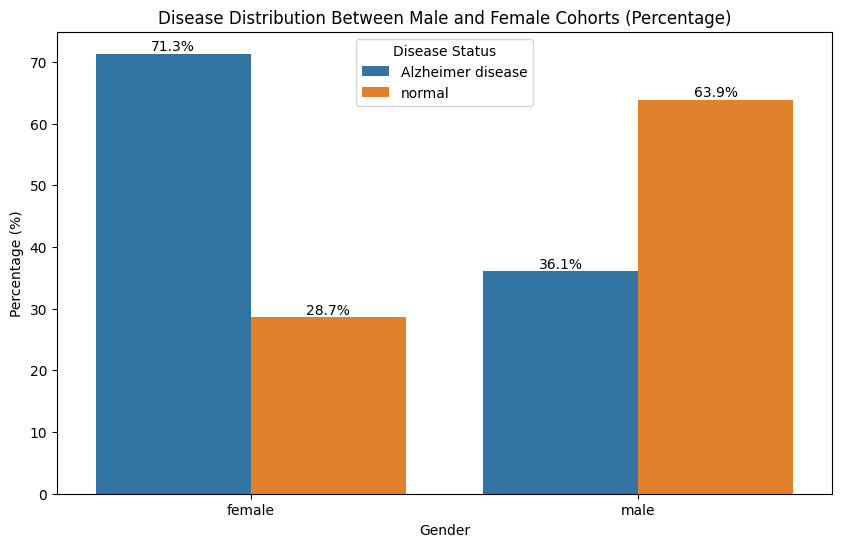

In [27]:
# Group by 'sex' and 'disease' and calculate counts
gender_disease_distribution = (
    adata.obs.groupby(['sex', 'disease'], observed=True)
    .size()
    .reset_index(name='count')
)

# Calculate percentage within each gender
gender_disease_distribution['percentage'] = (
    gender_disease_distribution['count']
    / gender_disease_distribution.groupby('sex')['count'].transform('sum')
    * 100
)

# Plot: Disease Distribution with Percentage Labels
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='sex',
    y='percentage',
    hue='disease',
    data=gender_disease_distribution
)

# Add percentage labels on each bar
ax.bar_label(ax.containers[0], fmt='%.1f%%')
ax.bar_label(ax.containers[1], fmt='%.1f%%')

# Set plot title and labels
plt.title("Disease Distribution Between Male and Female Cohorts (Percentage)")
plt.xlabel("Gender")
plt.ylabel("Percentage (%)")
plt.legend(title="Disease Status")
plt.show()


['female', 'male']
Categories (2, object): ['female', 'male']


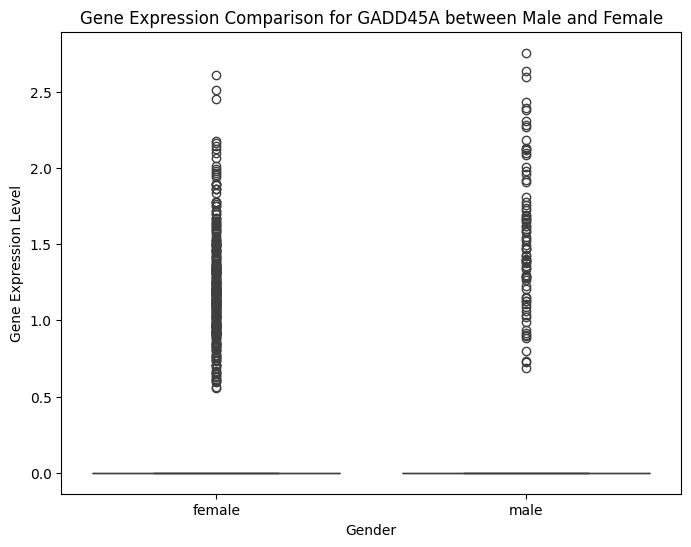

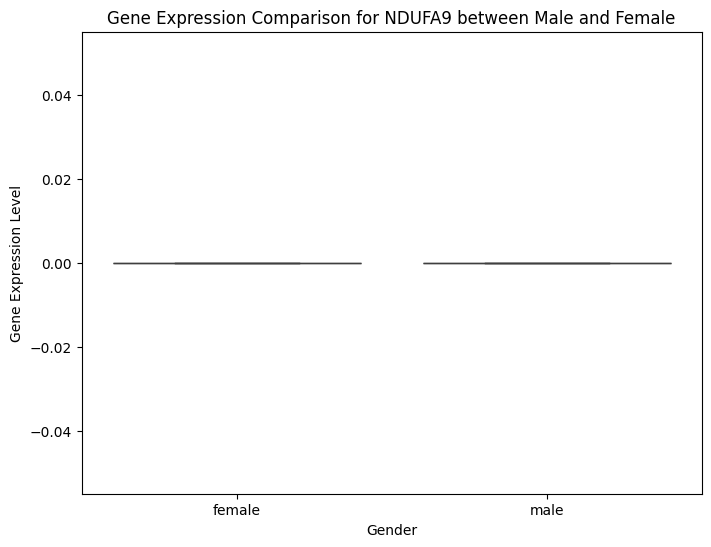

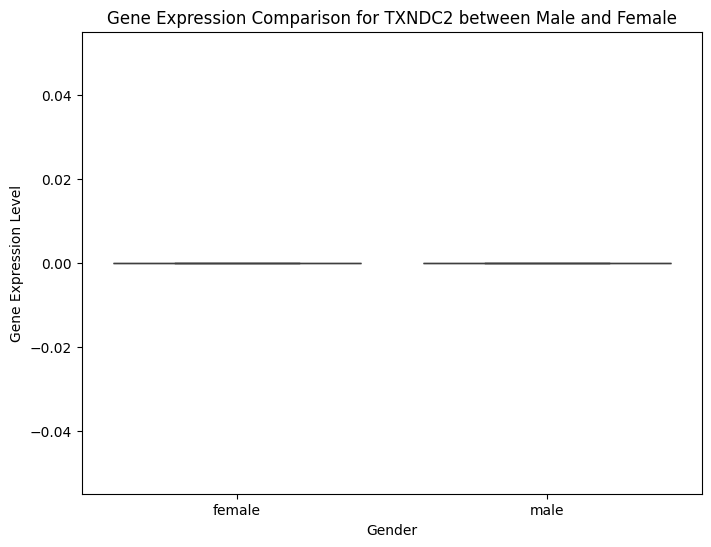

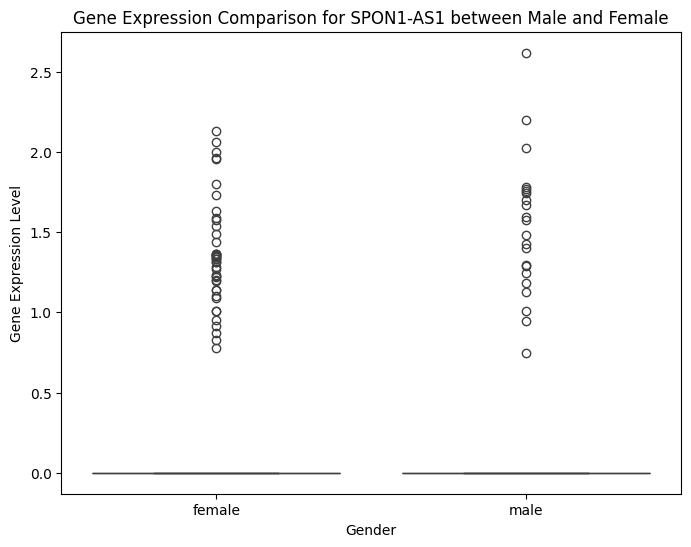

In [29]:
# Assuming 'adata' is your AnnData object containing the data
# Filter for Alzheimer's disease cases
adata_alzheimers = adata[adata.obs['disease'] == 'Alzheimer disease']

# Check unique values in the 'sex' column
print(adata_alzheimers.obs['sex'].unique())

# Define the genes of interest
genes_of_interest = ['GADD45A', 'NDUFA9', 'TXNDC2', 'SPON1-AS1']

# Ensure the genes are present in the data
present_genes = [gene for gene in genes_of_interest if gene in adata_alzheimers.var['feature_name'].values]

# Filter the dataset to include only the genes of interest
adata_filtered = adata_alzheimers[:, adata_alzheimers.var['feature_name'].isin(present_genes)]

# Create a DataFrame for gene expression values
# Ensure that the shape of the data is correct
gene_expression_data = adata_filtered.X if isinstance(adata_filtered.X, np.ndarray) else adata_filtered.X.A  # Convert to numpy if sparse
df = pd.DataFrame(gene_expression_data, columns=adata_filtered.var['feature_name'].values, index=adata_filtered.obs.index)

# Add the 'sex' column to the DataFrame
df['sex'] = adata_filtered.obs['sex'].values

# Plotting gene expression for male vs female
for gene in present_genes:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='sex', y=gene, data=df)
    plt.title(f"Gene Expression Comparison for {gene} between Male and Female")
    plt.xlabel("Gender")
    plt.ylabel("Gene Expression Level")
    plt.show()
